<h1>Real-world sensor dataset for city inbound-outbound critical intersection analysis<h1>

<p>This notebook explores the real-world sensor dataset for city inbound-outbound critical intersection analysis. This notebook demonstrates data analysis and visualization using various sensor data.</p>

<b>About the dataset</b>: There are a total of three types of sensors installed on the approaching lanes of the Sathorn-Surasak intersection in the Sathorn area of Bangkok: CCTV cameras, thermal cameras and induction loop coil sensors. Traffic volume data are collected every 5 s from CCTV sensors for 37 months from September 2016 to September 2019. Traffic volume and occupancy are collected every 5 s from loop coil sensors for 110 days from May 2016 to September 2016. Also, traffic volume and occupancy are collected every 5 s from thermal cameras for 26 days from May 30, 2016 to June 24, 2016. The dataset has temporal and spatial coverage of Sathorn road's main urban areas, including weekdays, weekends, and public and national holidays. The data used here can be downloaded at <a href=https://figshare.com/s/bef59df012778be4415d> figshare</a>.



1. <b>Load the data </b> 
<p>Please download data from <a href=https://figshare.com/s/bef59df012778be4415d> figshare</a> and upload the files to your Google drive.  This notebook will demonstrate analysis of city inbound-outbound critical intersection using all data types (CCTV cameras, loop coil sensors, thermal CCTV cameras, signal control data and taxi data.</p>

In [ ]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime,timedelta, date
import datetime as dt
import time
import calendar
import random
import os
import math

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


2.<b> Weekly traffic volume from loop coil sensors</b>
<p>We will plot weekly traffic volume from loop coil sensors on June 5 to 11, 2016.</p>

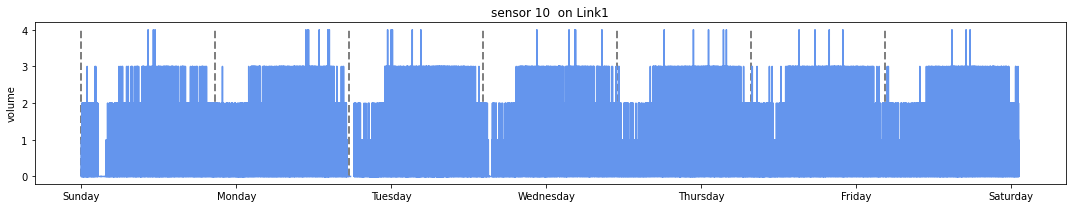

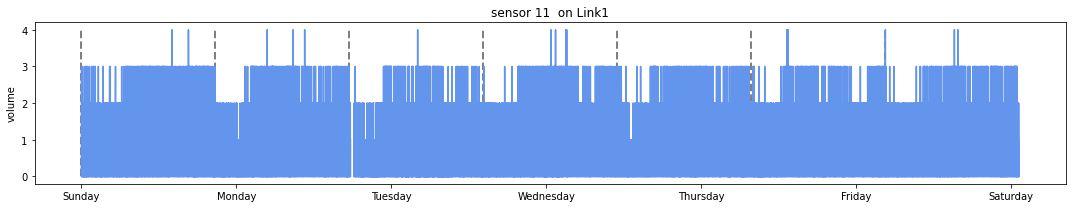

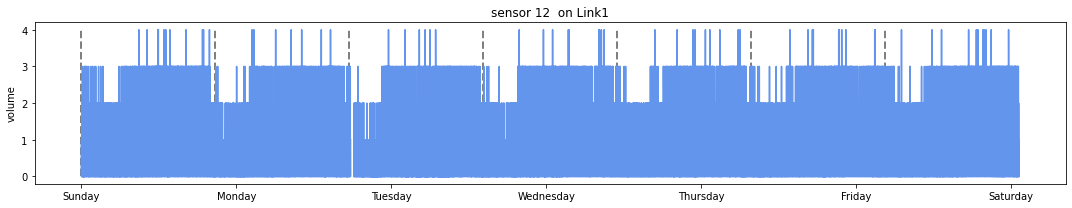

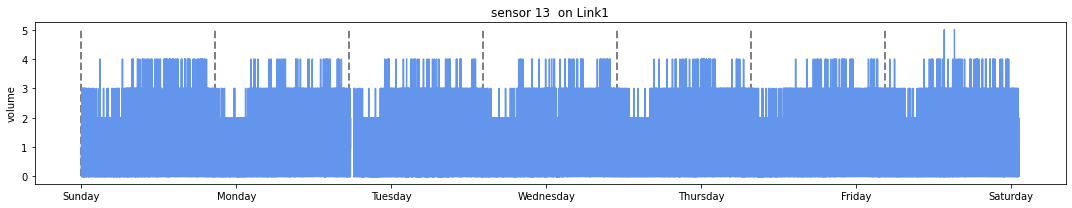

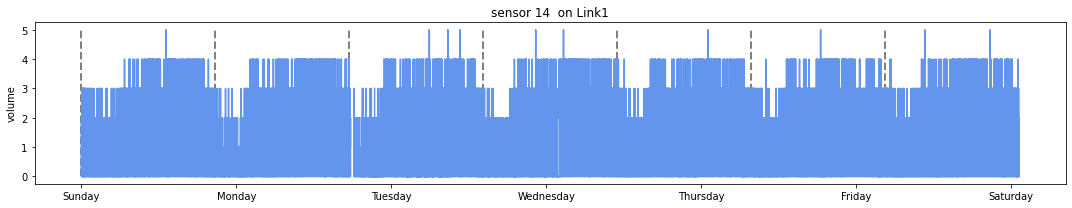

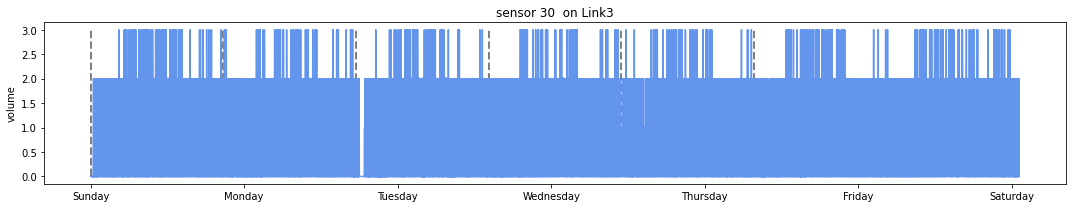

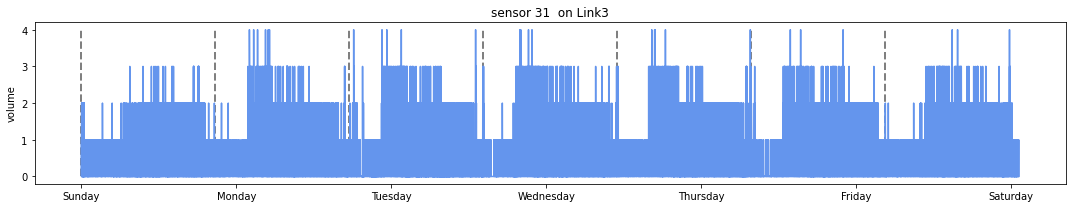

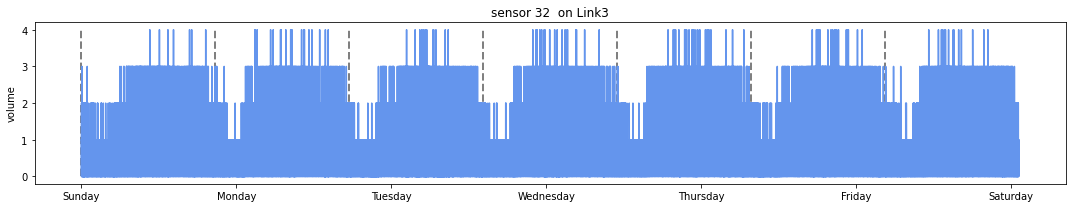

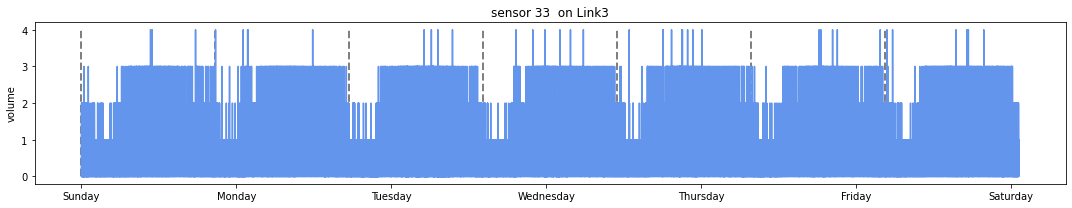

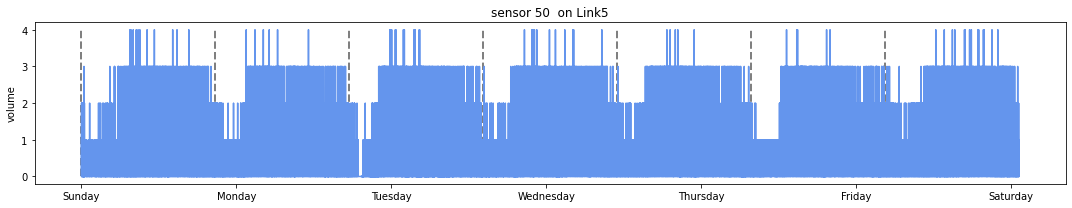

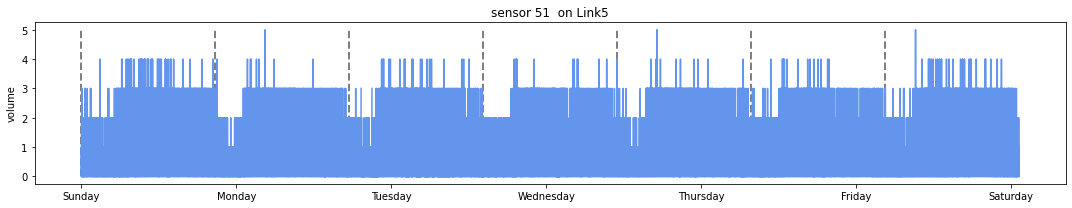

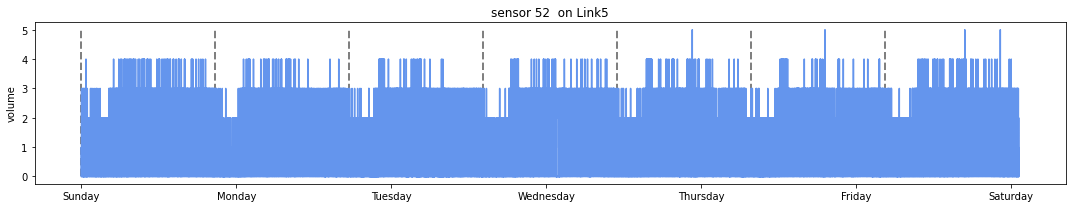

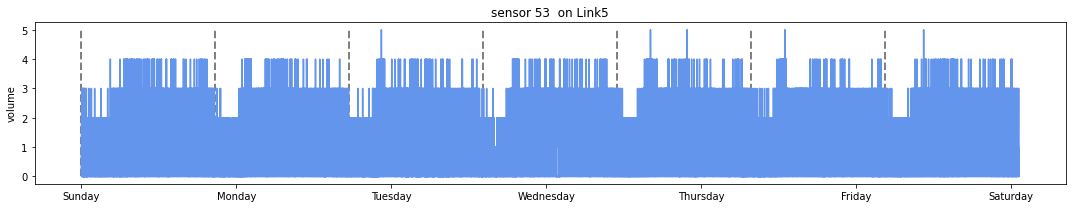

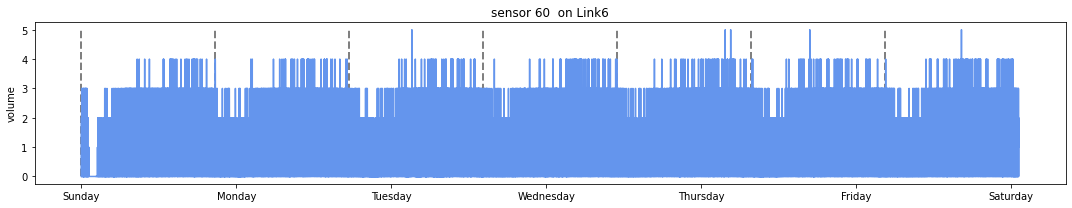

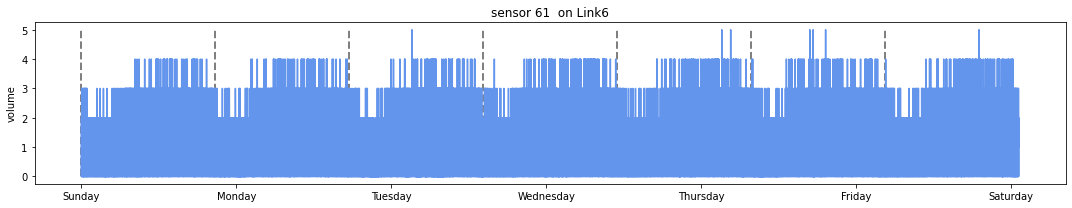

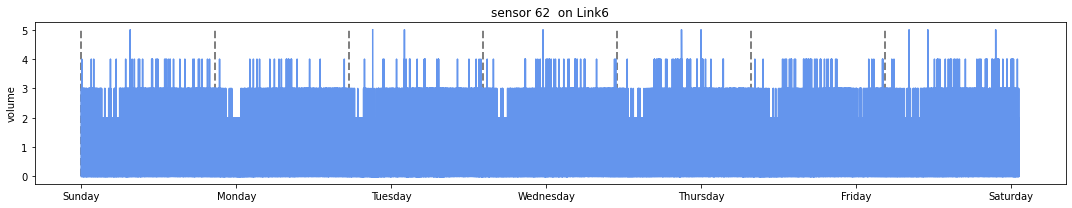

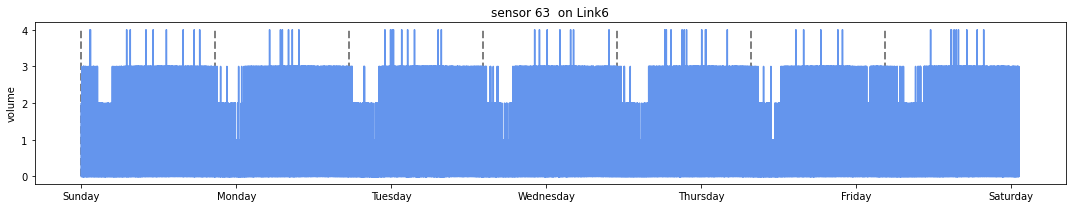

In [ ]:
#define start date to end date
sdate = date(2016, 6, 5)   # start date
edate = date(2016, 6, 11)   # end date
delta = edate - sdate       # as timedelta

#define dictionary of loop coil sensors for each link
loop_coil = {'Link1' : [10,11,12,13,14],
                'Link3' : [30,31, 32, 33],
                'Link5' : [50,51,52,53],
                'Link6' : [60,61,62,63]              
           }
#define the path 
dirpath = '/content/drive/...../'


for link, sensors in loop_coil.items():

    for sensor in sensors:        
                
        frames = []
        
        for i in range(delta.days + 1):
            temp_df = pd.DataFrame()
            day = sdate + timedelta(days=i)  
            convert_day = day.strftime("%Y%m%d")
            sensor_file = dirpath + "/loopcoil/"+ link+"/"+ convert_day +"_"+str(sensor)+".csv"        
            sensor_df = pd.read_csv(sensor_file)            
            sensor_df['Date'] = sensor_df['Date'].mask(sensor_df['Date'].isnull(), day)
            temp_df['Date'] = sensor_df['Date'] 
            temp_df[sensor]=sensor_df['Volume']
            frames.append(temp_df)
        
        df = pd.concat(frames)
        x = np.arange(start=0, stop=17280*7, step=17280) # every 5s 
        df['Date'] = pd.to_datetime(df['Date']) 
        df['Day'] = df['Date'].dt.day_name() 
        df.set_index(df['Day'], inplace=True)   
        df[sensor].plot(figsize=(15,3),legend=None,color='cornflowerblue')
        plt.ylabel('volume')
        plt.xlabel(None)
        plt.title('sensor '+str(sensor)+ '  on '+link)
        plt.vlines(x=x,ymin=0, ymax=df[sensor].max(), colors='gray', ls='--', lw=2)
        plt.tight_layout()
        plt.show()

3.<b> Weekly traffic volume from thermal camera</b>
<p>We will plot weekly traffic volume from thermal cameras on June 6 to 10, 2016.</p>

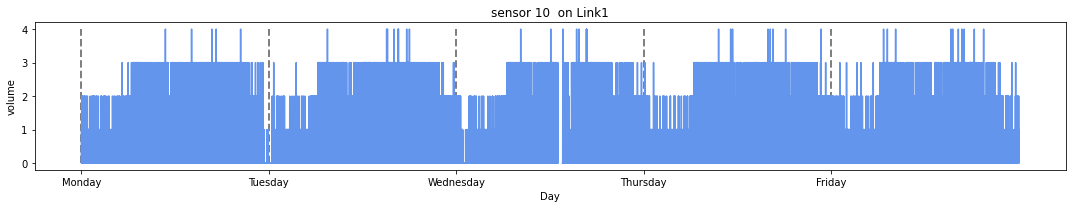

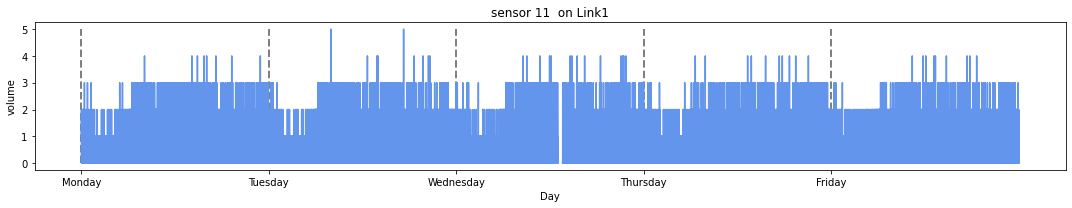

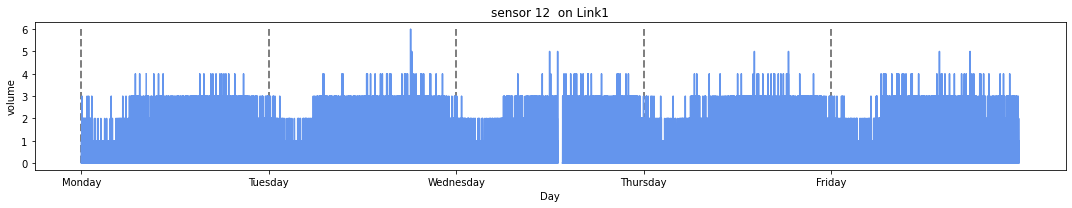

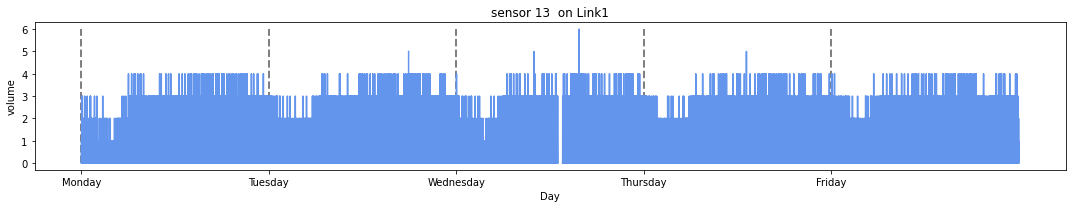

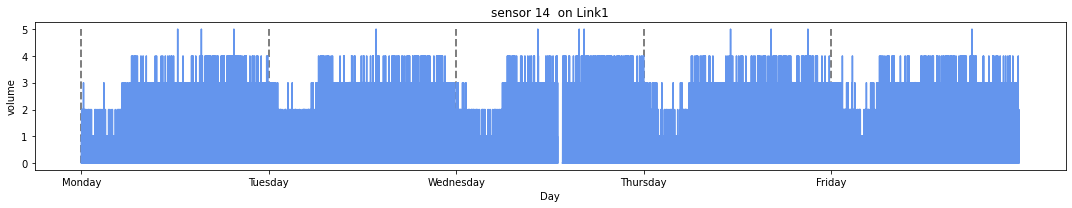

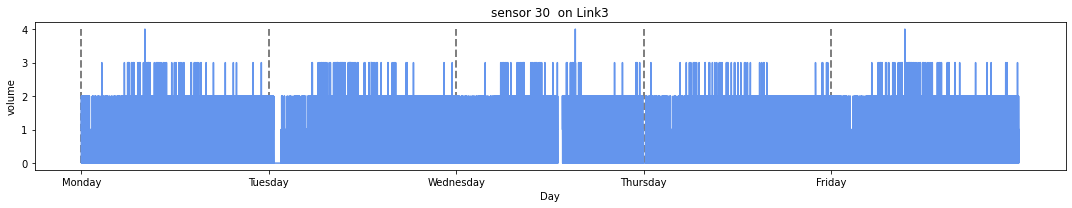

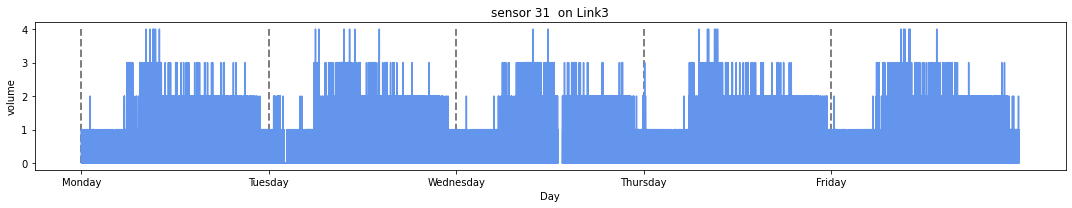

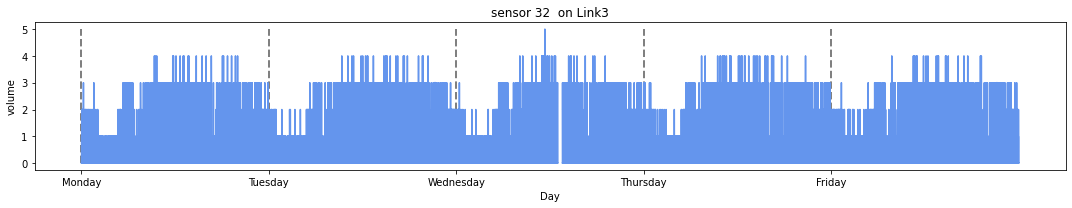

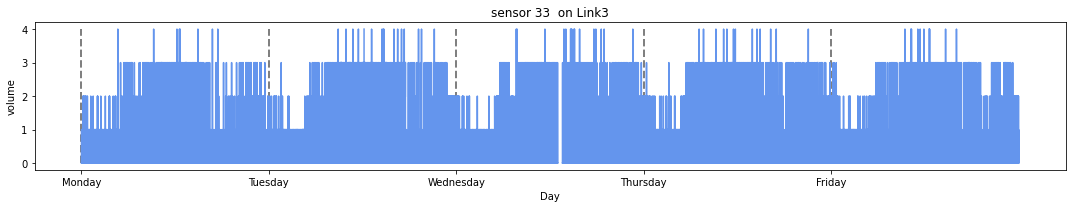

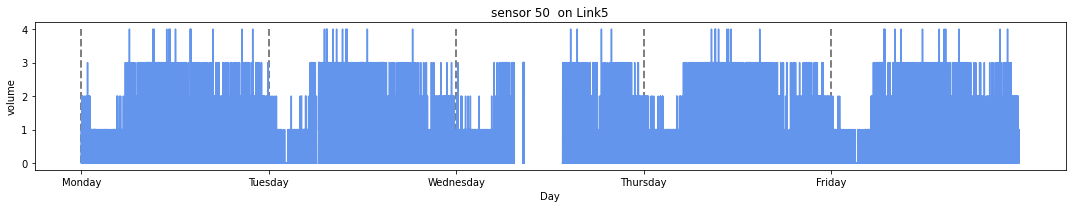

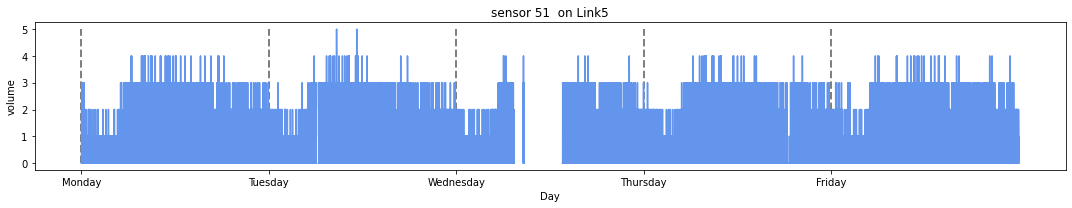

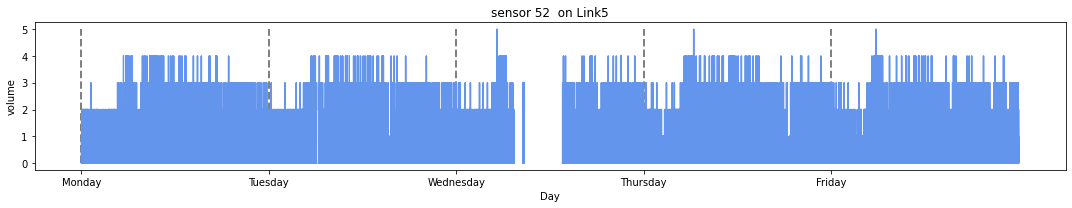

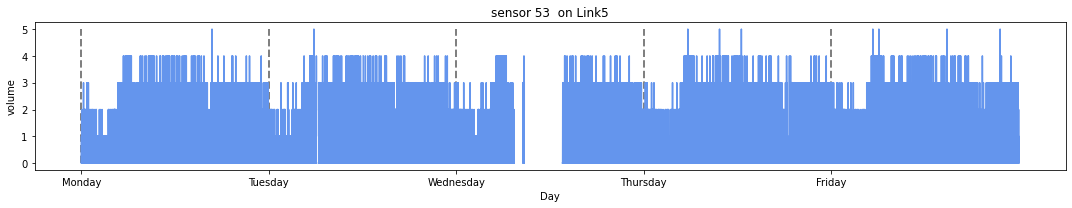

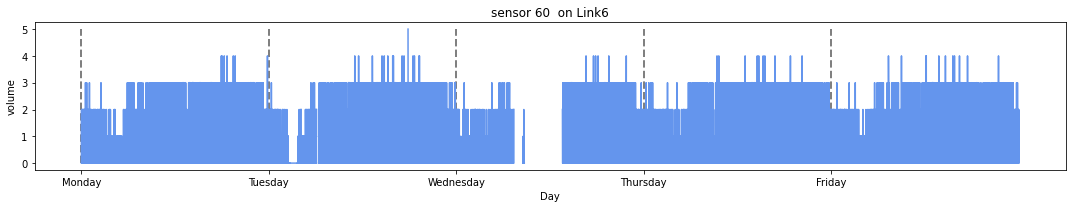

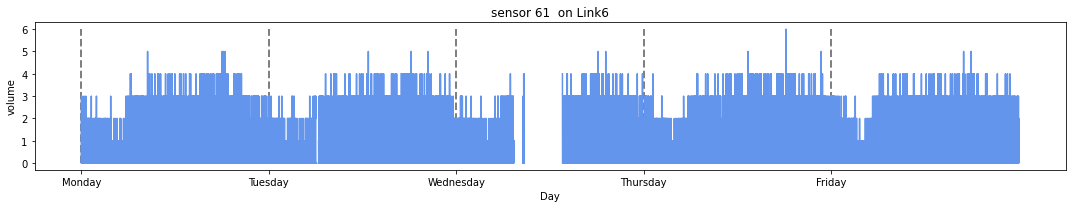

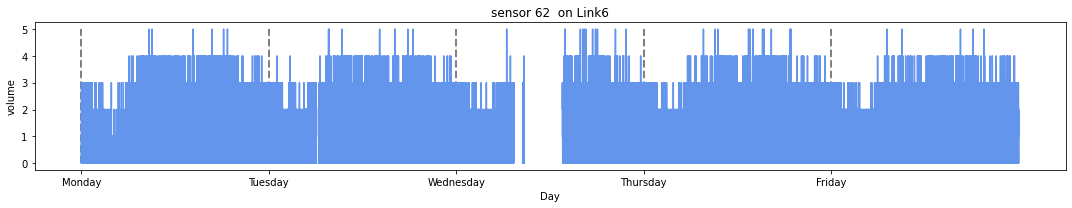

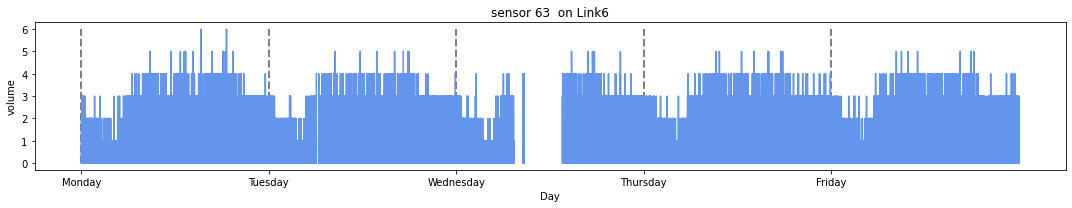

In [ ]:
#define start date to end date
sdate = date(2016, 6, 6)   # start date
edate = date(2016, 6, 10)   # end date
delta = edate - sdate       # as timedelta

#define dictionary of thermal cameras for each link
thermal = {'Link1' : [10,11,12,13,14],
                'Link3' : [30,31, 32, 33],
                'Link5' : [50,51,52,53],
                'Link6' : [60,61,62,63]              
           }

#define the path 
dirpath = '/content/drive/...../'


for link, sensors in thermal.items():

    for sensor in sensors:             
        
        frames = []
        
        for i in range(delta.days + 1):
            temp_df = pd.DataFrame()
            day = sdate + timedelta(days=i)  
            convert_day = day.strftime("%Y%m%d")
            sensor_file = dirpath + "/thermal-cctv/"+ link+"/"+ convert_day +"_"+str(sensor)+".csv"

            if os.path.isfile(sensor_file):
                sensor_df = pd.read_csv(sensor_file)                           
                sensor_df['Date'] = sensor_df['Date'].mask(sensor_df['Date'].isnull(), day)
                temp_df['Date'] = sensor_df['Date'] 
                temp_df[sensor]=sensor_df['Volume']
                frames.append(temp_df)
            else:
                print(sensor_file, 'is missing data')
        
        df = pd.concat(frames)
        x = np.arange(start=0, stop=17280*5, step=17280) # every 5s 
        labels = ['Monday', 'Tuesday', 'Wednesday','Thursday','Friday'] 
        
        df['Date'] = pd.to_datetime(df['Date']) 
        df['Day'] = df['Date'].dt.day_name() 
        df.set_index(df['Day'], inplace=True)   
        df[sensor].plot(figsize=(15,3),legend=None,color='cornflowerblue')
        plt.ylabel('volume')
        plt.xticks(x, labels)      
        plt.title('sensor '+str(sensor)+ '  on '+link)
        plt.vlines(x=x,ymin=0, ymax=df[sensor].max(), colors='gray', ls='--', lw=2)
        plt.tight_layout()
        plt.show()

4. <b>Traffic volume from loop coil and thermal cameras</b>
<p>We will plot the scattering points of traffic volume from loop coil and thermal cameras. Here, the points have been internationally perturbed by small random noises so that one can see the scattering point's occurrence frequency.</p>



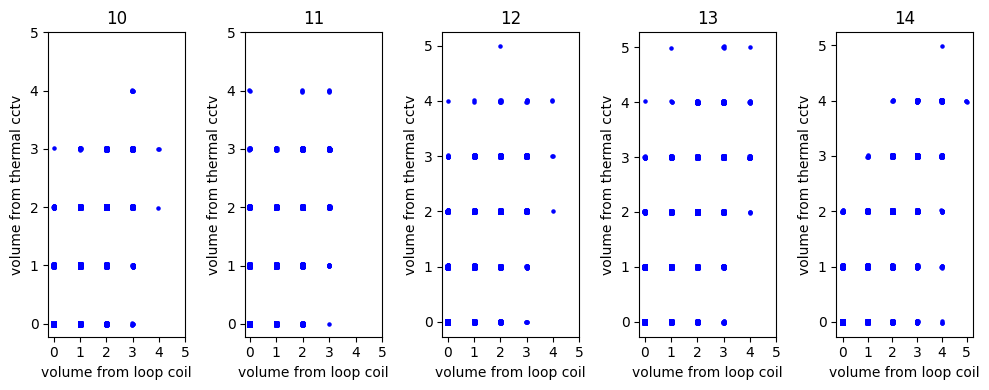

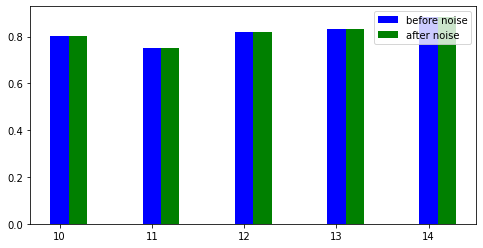

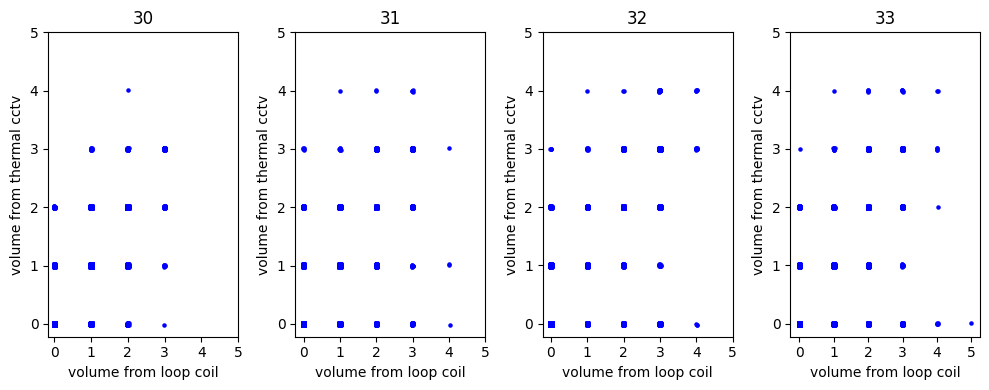

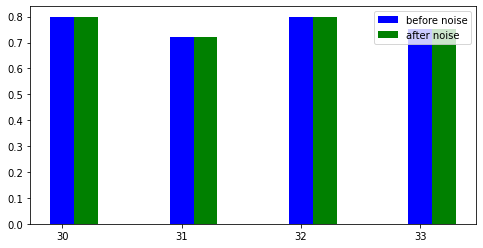

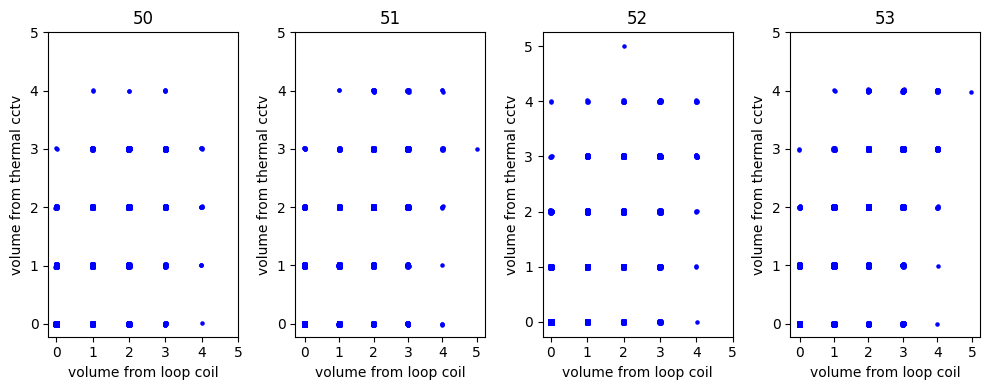

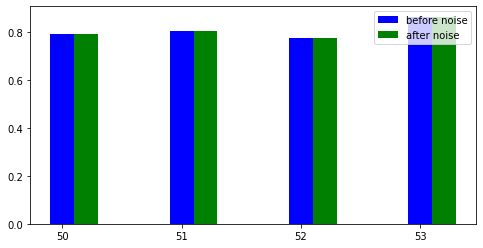

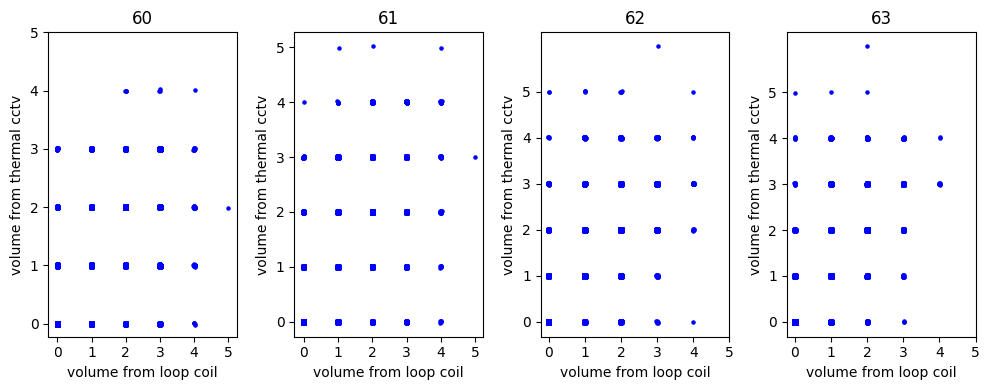

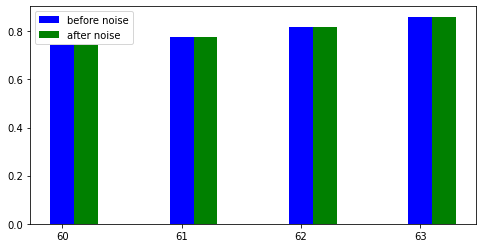

In [ ]:
bothsensors = {
            'Link1':[10,11,12,13,14],
            'Link3':[30,31,32,33],
            'Link5':[50,51,52,53],
            'Link6':[60,61,62,63],
            }

startingdate = dt.datetime(2016, 6, 2) 
endingdate = dt.datetime(2016, 6, 2)

tempdate = startingdate
while tempdate <= endingdate:
    
    #define the path 
    dirpath = '/content/drive/...../'
    
    looppath = str(tempdate.year) + "" + str(tempdate.strftime('%m')) + "" + str(tempdate.strftime('%d'))
    thermapath = str(tempdate.year) + "" + str(tempdate.strftime('%m')) + "" + str(tempdate.strftime('%d'))

    for link, sensors in bothsensors.items():
        all_sensors = {}
        correlation_beforenoise = {}
        correlation_afternoise = {}
        for sensor in sensors:
            loopcoil_sensor_df = pd.read_csv(dirpath + "/loopcoil/"+ link+"/"+ looppath +"_"+str(sensor)+".csv")
            thermal_sensor_df = pd.read_csv(dirpath + "/thermal-cctv/"+ link+"/"+ thermapath +"_"+str(sensor)+".csv")

            loopcoil_sensor = loopcoil_sensor_df[['Date','Time','Volume','Occupancy']]
            loopcoil_sensor['Time'] = pd.to_datetime(loopcoil_sensor['Time'], format='%H:%M:%S').dt.time
            loopcoil_sensor = loopcoil_sensor.set_index(loopcoil_sensor['Time'])

            thermal_sensor = thermal_sensor_df[['Date', 'Time', 'Volume', 'Occupancy']]
            thermal_sensor['Time'] = pd.to_datetime(thermal_sensor['Time'], format='%H:%M:%S').dt.time
            thermal_sensor = thermal_sensor.set_index(thermal_sensor['Time'])

            correlation_beforenoise[sensor] = loopcoil_sensor['Volume'].corr(thermal_sensor['Volume'])

            loopcoil_sensor['Volume'] = loopcoil_sensor['Volume']+loopcoil_sensor['Volume'].apply(lambda x: random.uniform(-0.02, 0.02))
            thermal_sensor['Volume'] = thermal_sensor['Volume']+ thermal_sensor['Volume'].apply(lambda x: random.uniform(-0.02, 0.02))

            correlation_afternoise[sensor] = loopcoil_sensor['Volume'].corr(thermal_sensor['Volume'])

            all_sensors[sensor] = pd.concat([loopcoil_sensor['Volume'], thermal_sensor['Volume']], axis=1)


        fig, axes = plt.subplots(1, len(sensors), figsize=(10, 4), dpi=100, tight_layout=True)
        index = 0
        for sensor, df in all_sensors.items():
            
            axes[index].set_title(sensor)
            axes[index].scatter(df.iloc[:, [0]],df.iloc[:, [1]], marker="o", s = 5, color= 'blue')
            axes[index].set_xlabel("volume from loop coil")
            axes[index].set_ylabel("volume from thermal cctv")
            axes[index].set_yticks(np.arange(0, 6, 1))
            axes[index].set_xticks(np.arange(0, 6, 1))
            index += 1

        
        plt.tight_layout()
        plt.show()

        f1 = plt.figure(figsize=(8,4))
        X = np.arange(len(correlation_beforenoise))
        ax = plt.subplot(111)
        ax.bar(X, correlation_beforenoise.values(), width=0.2, color='b', align='center')
        ax.bar(X+0.2, correlation_afternoise.values(), width=0.2, color='g', align='center')
        ax.legend(('before noise', 'after noise'))
        ax.set_xticks(range(len(sensors)))
        ax.set_xticklabels(sensors)
        plt.show()

        tempdate = tempdate + timedelta(days=1)

5. <b>Fundamental diagram for average volume and occpancy from loop coil sensors</b>
<p>We plot volume-occupancy relationship from loop coil sensors.</p>

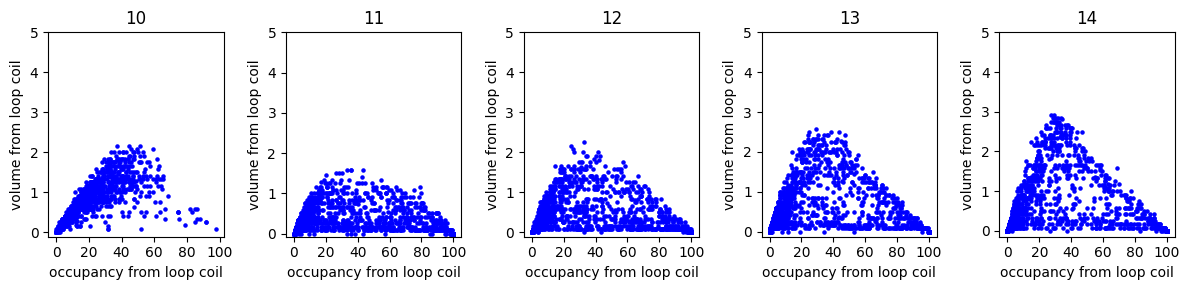

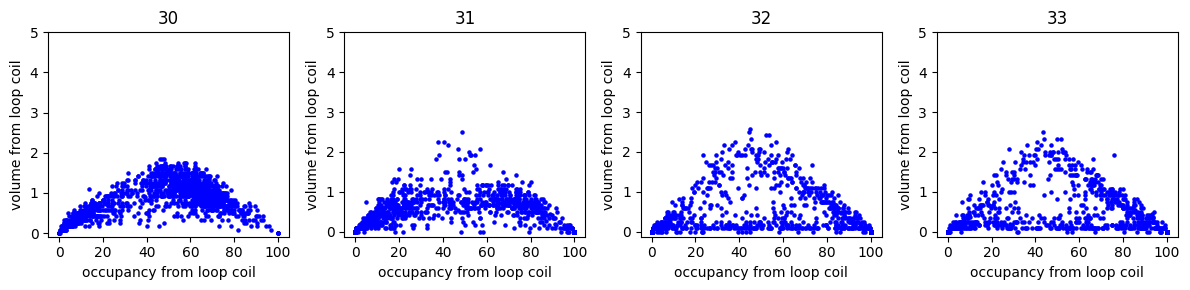

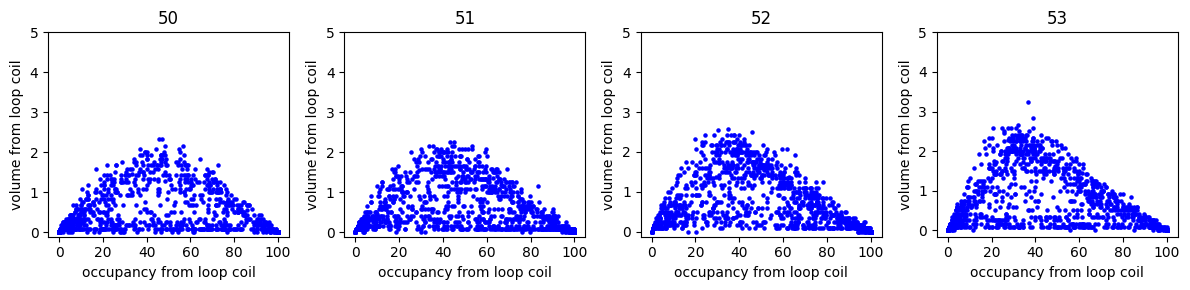

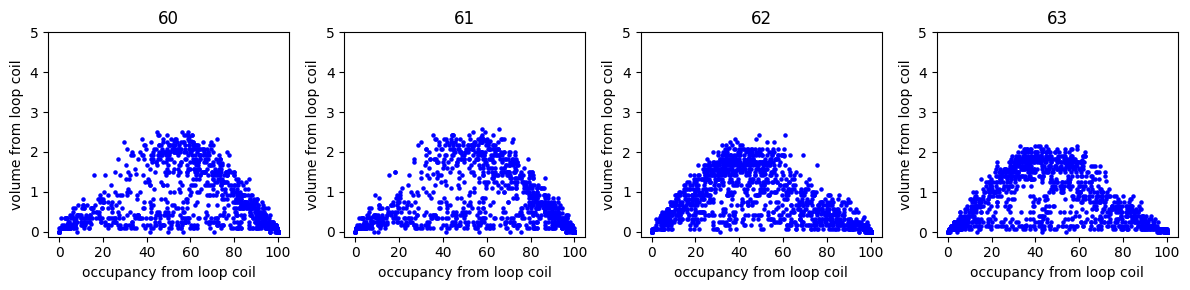

In [ ]:
loopcoil = {
            'Link1':[10,11,12,13,14],
            'Link3':[30,31,32,33],
            'Link5':[50,51,52,53],
            'Link6':[60,61,62,63],
            }

startingdate = dt.datetime(2016, 6, 2) 
endingdate = dt.datetime(2016, 6, 2)

tempdate = startingdate
while tempdate <= endingdate:
    #define the path 
    dirpath = '/content/drive/...../'

    looppath = str(tempdate.year) + "" + str(tempdate.strftime('%m')) + "" + str(tempdate.strftime('%d'))

    for link, sensors in loopcoil.items():
        all_sensors = {}
        for sensor in sensors:
            loopcoil_sensor_df = pd.read_csv(dirpath + "/loopcoil/"+ link+"/"+ looppath +"_"+str(sensor)+".csv")

            loopcoil_sensor = loopcoil_sensor_df[['Date', 'Time', 'Volume', 'Occupancy']]
            loopcoil_sensor['Time'] = pd.to_datetime(loopcoil_sensor['Time'], format='%H:%M:%S')
            loopcoil_sensor = loopcoil_sensor.set_index(loopcoil_sensor['Time']).resample('min').mean()

            all_sensors[sensor] = pd.concat([loopcoil_sensor['Occupancy'], loopcoil_sensor['Volume']], axis=1)


        fig, axes = plt.subplots(1, len(sensors), figsize=(12, 3), dpi=100, tight_layout=True)
        index = 0
        for sensor, df in all_sensors.items():

            axes[index].set_title(sensor)
            axes[index].scatter(df.iloc[:, [0]],df.iloc[:, [1]], marker="o", s = 5, color= 'blue')
            axes[index].set_xlabel("occupancy from loop coil")
            axes[index].set_ylabel("volume from loop coil")
            axes[index].set_yticks(np.arange(0, 6, 1))
            axes[index].set_xticks(np.arange(0, 120, 20))
            index += 1

        plt.tight_layout()
        plt.show()
        tempdate = tempdate + timedelta(days=1)

6. <b>Fundamental diagram for average volume and occpancy from thermal cameras</b>
<p>We plot volume-occupancy relationship from thermal cameras.</p>

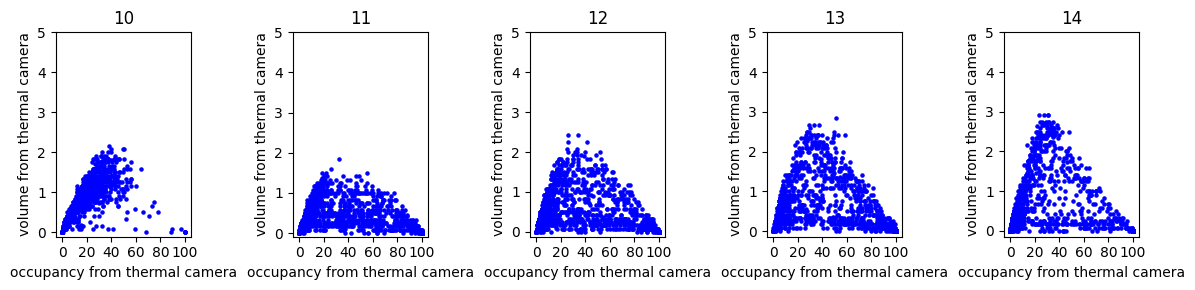

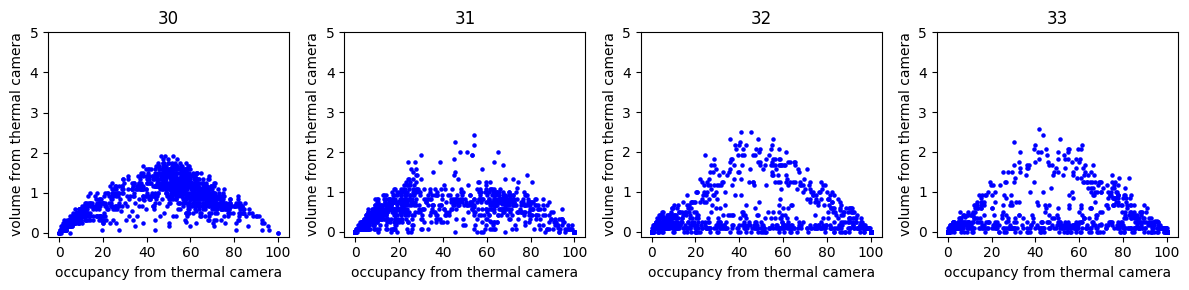

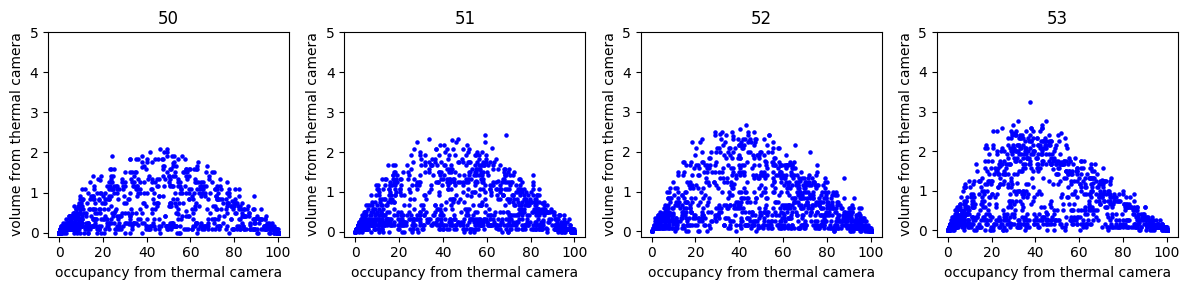

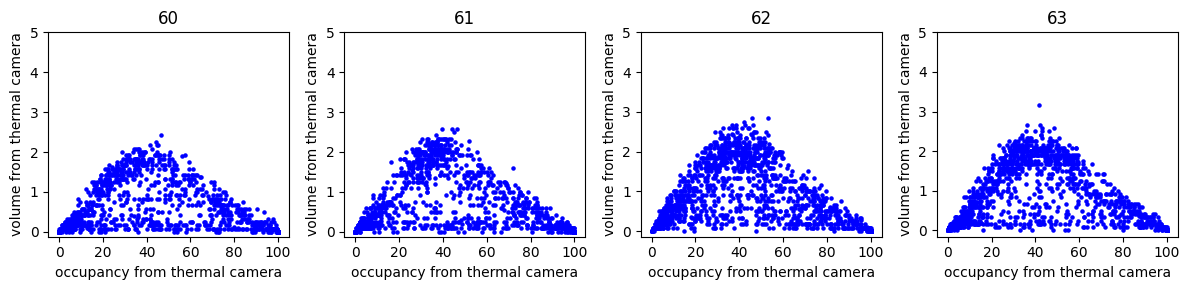

In [ ]:
thermal = {
            'Link1':[10,11,12,13,14],
            'Link3':[30,31,32,33],
            'Link5':[50,51,52,53],
            'Link6':[60,61,62,63],
            }

startingdate = dt.datetime(2016, 6, 2) 
endingdate = dt.datetime(2016, 6, 2)

tempdate = startingdate
while tempdate <= endingdate:
    #define the path 
    dirpath = '/content/drive/...../'

    thermapath = str(tempdate.year) + "" + str(tempdate.strftime('%m')) + "" + str(tempdate.strftime('%d'))

    for link, sensors in thermal.items():
        all_sensors = {}
        for sensor in sensors:
            thermal_sensor_df = pd.read_csv(dirpath + "/thermal-cctv/"+ link+"/"+ thermapath +"_"+str(sensor)+".csv")

            thermal_sensor = thermal_sensor_df[['Date', 'Time', 'Volume', 'Occupancy']]
            thermal_sensor['Time'] = pd.to_datetime(thermal_sensor['Time'], format='%H:%M:%S')
            thermal_sensor = thermal_sensor.set_index(thermal_sensor['Time']).resample('min').mean()

            all_sensors[sensor] = pd.concat([thermal_sensor['Occupancy'], thermal_sensor['Volume']], axis=1)


        fig, axes = plt.subplots(1, len(sensors), figsize=(12, 3), dpi=100, tight_layout=True)
        index = 0
        for sensor, df in all_sensors.items():

            axes[index].set_title(sensor)
            axes[index].scatter(df.iloc[:, [0]],df.iloc[:, [1]], marker="o", s = 5, color= 'blue')
            axes[index].set_xlabel("occupancy from thermal camera")
            axes[index].set_ylabel("volume from thermal camera")
            axes[index].set_yticks(np.arange(0, 6, 1))
            axes[index].set_xticks(np.arange(0, 120, 20))
            index += 1

        plt.tight_layout()
        plt.show()
        tempdate = tempdate + timedelta(days=1)

7. <b>Total volume per hour from loop coil sensors</b>
<p>Firstly, we sum up volume from each loop coil sensors on each link. </p>

In [ ]:
startingdate = dt.datetime(2016, 5, 28)
endingdate = dt.datetime(2016, 9, 13)
loopcoil = {
            'Link1':[10,11,12,13,14],
            'Link3':[30,31,32,33],
            'Link5':[50,51,52,53],
            'Link6':[60,61,62,63],
            }
link_short_name={"Link1":"l1","Link3":"l3","Link5":"l5","Link6":"l6"}
#define the path 
dirpath = '/content/drive/...../'
os.makedirs(dirpath + '/loopcoil-total' ,exist_ok=True)
tempdate = startingdate
while tempdate <= endingdate:
    try:
        for link, sensors in loopcoil.items():
            v_col = []
            o_col = []
            df = pd.DataFrame()
            for sensor in sensors:
                
                path = str(tempdate.year) + "" + str(tempdate.strftime('%m')) + "" + str(tempdate.strftime('%d'))
                
                loopcoil_sensor_df = pd.read_csv(dirpath + "/loopcoil/"+ link+"/"+ path +"_"+str(sensor)+".csv")

                df['Time'] = loopcoil_sensor_df['Time']
                df['Volume_'+str(sensor)] = loopcoil_sensor_df ['Volume']                
                df['Occupancy_' + str(sensor)] = loopcoil_sensor_df['Occupancy']

                v_col.append('Volume_' + str(sensor))
                o_col.append('Occupancy_' + str(sensor))
            
            df = df.loc[:,~df.columns.duplicated()]
            vldf = df[[*v_col]]
            df['avg_vl'] = vldf.mean(numeric_only=True, axis = 1)
            df['total_vl'] = vldf.sum(numeric_only = True, axis = 1)
            
            ocdf = df[[*o_col]]
            df['avg_oc'] = ocdf.mean(numeric_only=True, axis = 1)
            df['total_oc'] = ocdf.sum(numeric_only=True, axis=1)          

            os.makedirs(dirpath + '/loopcoil-total/'  + link ,exist_ok=True)
            df.to_csv(dirpath + '/loopcoil-total/'  + link+ "/"+path+"_"+link_short_name.get(link)+".csv", sep=",", index=False)

    except:
        pass
    tempdate = tempdate + timedelta(days=1)

In [ ]:
#to generate time sequence
def hourly_yield_times():
    from datetime import date, time, datetime, timedelta
    start = datetime.combine(date.today(), time(0, 0,0))
    end= datetime.combine(date.today(), time(23, 59,55))
    time_list=list()
    #yield start.strftime("%H:%M:%S")
    while start<=end :
        time_list.append(start.strftime("%H:%M:%S"))
        start += timedelta(hours=1)
        
    return time_list


<p>We plot hourly total volume from loop coil sensors on Link 1.</p>

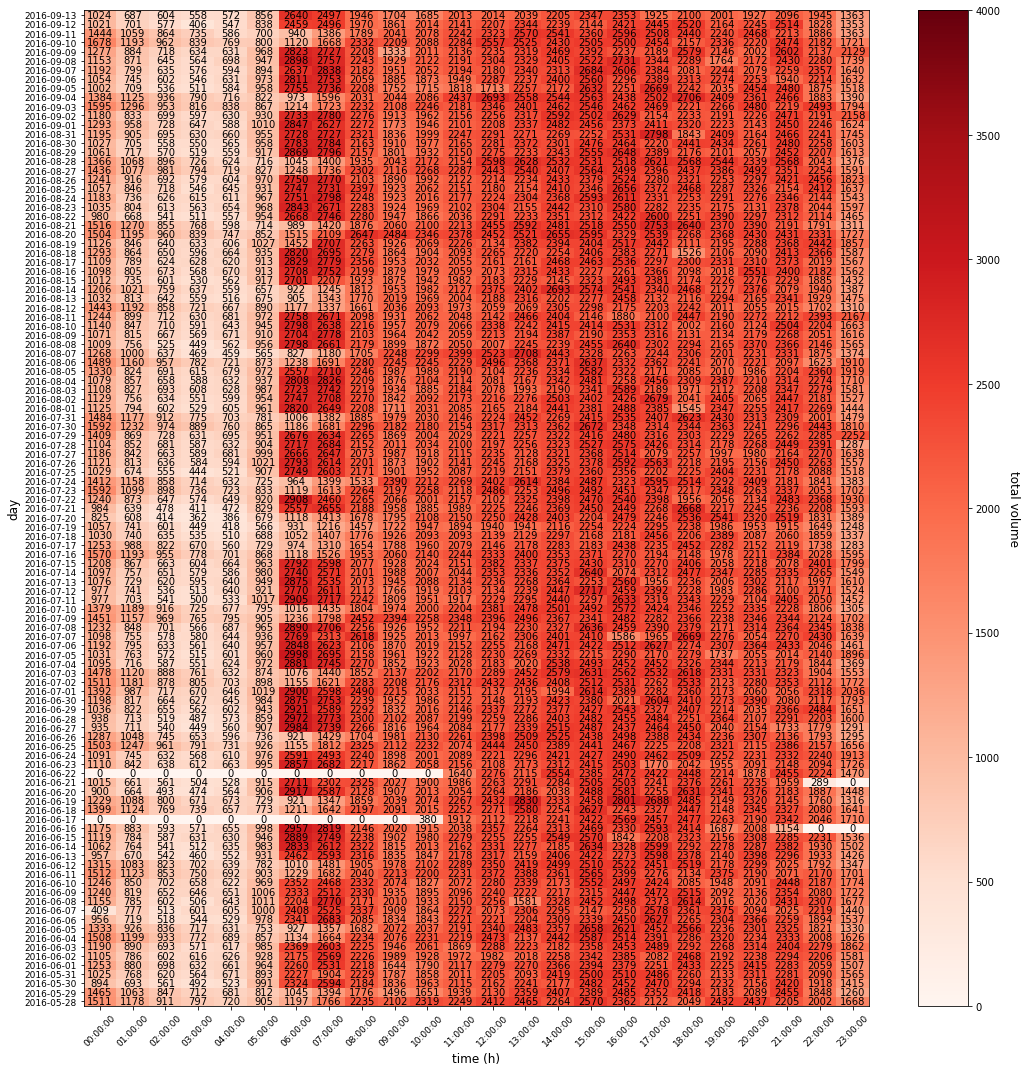

In [ ]:
startingdate = dt.datetime(2016, 5, 28)
endingdate = dt.datetime(2016, 9, 13)

 #define the path 
dirpath = '/content/drive/...../'

data = []
alldays = []
tempdate = startingdate
time_labels = hourly_yield_times()
while tempdate <= endingdate:

    alldays.append(tempdate.strftime("%Y-%m-%d"))
    path = str(tempdate.year) + "" + str(tempdate.strftime('%m')) + "" + str(tempdate.strftime('%d'))
    l1path = dirpath + "/loopcoil-total/Link1/"+ path + "_l1.csv" # you can change link name as Link 1 (l1), Link 3 (l3), Link 5 (l5), Link 6 (l6)
    
    df = pd.read_csv(l1path, sep=',')

    df = df.set_index(pd.DatetimeIndex(df['Time']))
    data.append(df['total_vl'].resample('h').sum())

    tempdate = tempdate + timedelta(days=1)

fig, axis = plt.subplots()
heatmap = axis.pcolor(data, cmap='Reds', vmin=0, vmax=4000)

# this code block is to put text in heatmap cell
for y in range(np.array(data).shape[0]):
    for x in range(np.array(data).shape[1]):
        plt.text(x + 0.5, y + 0.5, '%.0f' % np.array(data)[y, x],  
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='black')

axis.set_yticks(np.arange(np.array(data).shape[0]) + 0.5, minor=False)
axis.set_xticks(np.arange(np.array(data).shape[1]) + 0.5, minor=False)


axis.set_yticklabels(alldays, minor=False, fontsize=9)
axis.set_xticklabels(time_labels, minor=False, fontsize=9, rotation= 45)
# axis.set_title("Hourly Total Volume of Link1", fontsize=10)
axis.set_xlabel("time (h)", fontsize=12)
axis.set_ylabel("day", fontsize=12)

fig.set_size_inches(15, 15)
cbar=plt.colorbar(heatmap)
cbar.set_label('total volume', rotation=270,fontsize=12,labelpad=20)
cbar.ax.tick_params(labelsize=10)
plt.tight_layout()
# plt.clf()
plt.show()

8. <b>Traffic volume from CCTV cameras</b>
<p>We plot traffic volume for every 5s and moving average per hour from CCTV cameras on each link.</p>

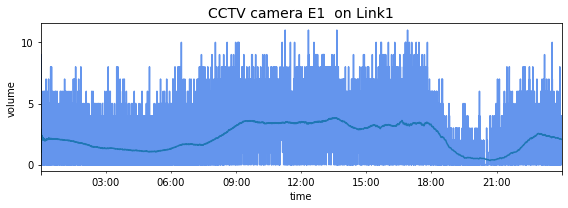

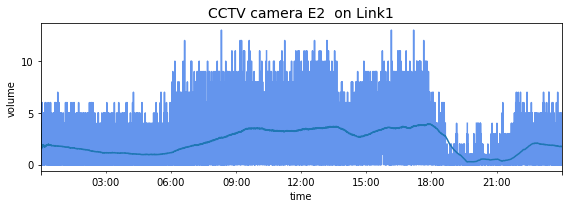

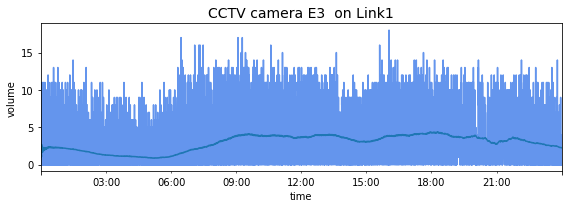

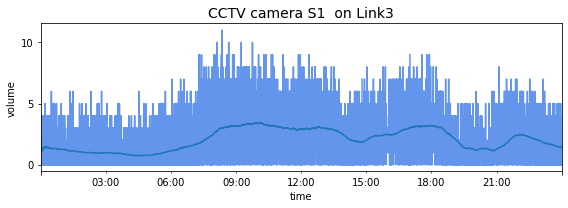

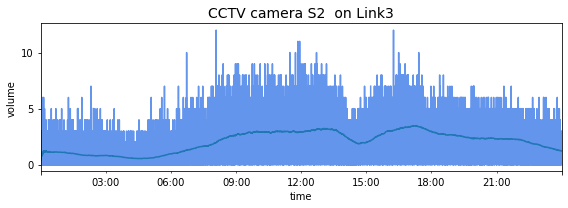

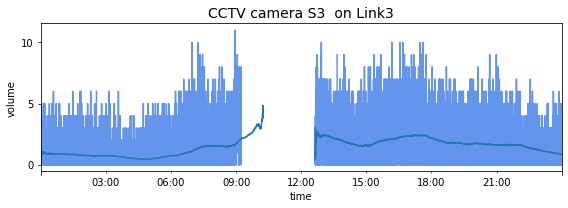

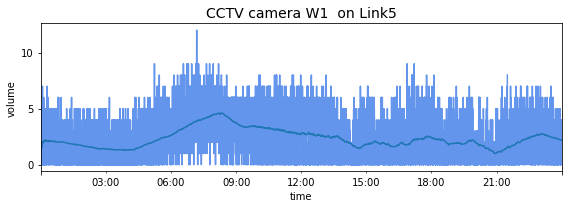

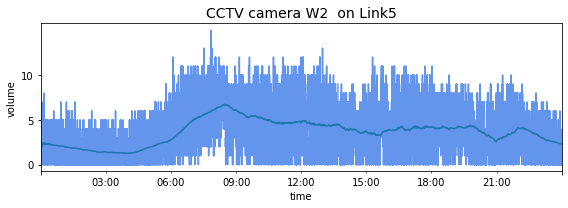

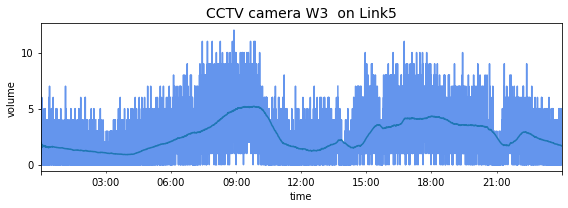

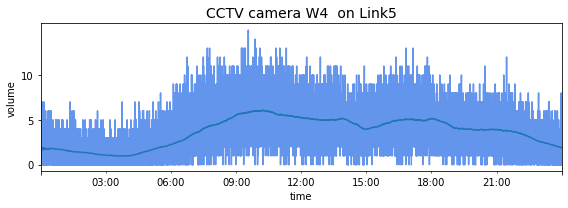

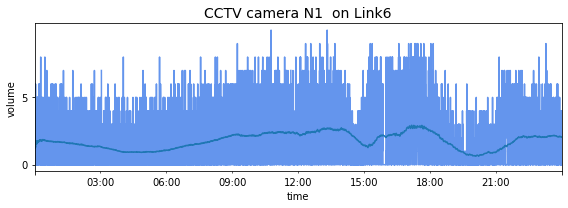

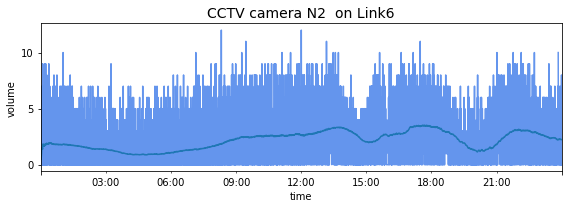

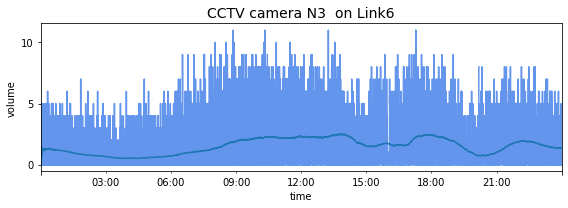

In [ ]:
#define start date to end date
sdate = date(2016, 10, 2)   # start date
edate = date(2016, 10, 2)   # end date
delta = edate - sdate       # as timedelta

cctv={"Link1":["E1", "E2", "E3"],
      "Link3":["S1", "S2", "S3"],
      "Link5":["W1", "W2", "W3","W4"],
      "Link6":["N1", "N2", "N3"]
      }
link_short_name={"Link1":"l1","Link3":"l3","Link5":"l5","Link6":"l6"}
dirpath = '/content/drive/...../'
for link, sensors in cctv.items(): 
    frames = []
    for i in range(delta.days+1):
        day = sdate + timedelta(days=i)  
        convert_day = day.strftime("%Y%m%d")
        link_file = dirpath + '/cctv-camera/'+link+'/'+convert_day+'_volume_'+link_short_name.get(link)+'.csv'
        
        link_df = pd.read_csv(link_file)
        link_df['Time'] = pd.to_datetime(link_df['Time'])
        link_df = link_df.set_index(link_df['Time'])
            
        for sensor in sensors:            
            
            link_df[sensor].plot(figsize=(8,3),legend=None,color='cornflowerblue')
            link_df[sensor].rolling("1H").mean().plot()                        
            plt.yticks(np.arange(0,link_df[sensor].max(),5))
            ticks, labels = plt.xticks()

            plt.xticks(ticks, labels)
            plt.ylabel('volume')
            plt.xlabel('time')
            plt.title('CCTV camera '+str(sensor)+ '  on '+link,fontsize=14)
            plt.tight_layout()
            plt.show()
            

9. <b>Weekly traffic volume from CCTV cameras</b>
<p>We plot weekly traffic volume for every 5s from CCTV cameras on each link.</p>

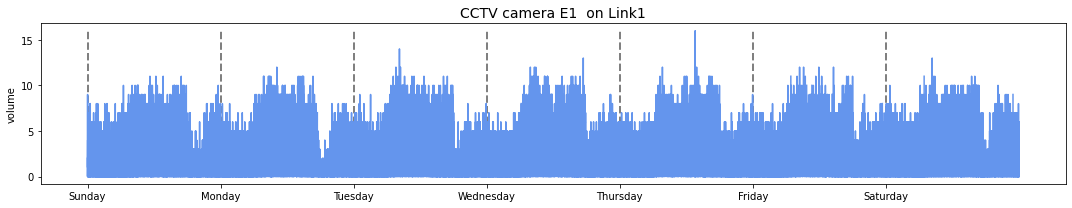

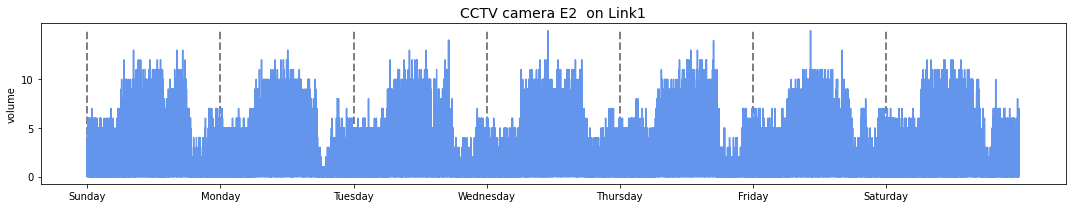

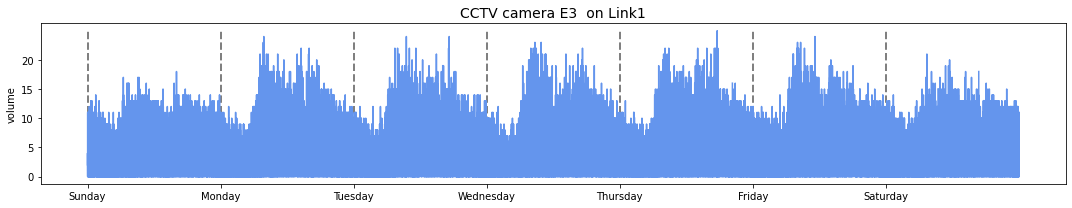

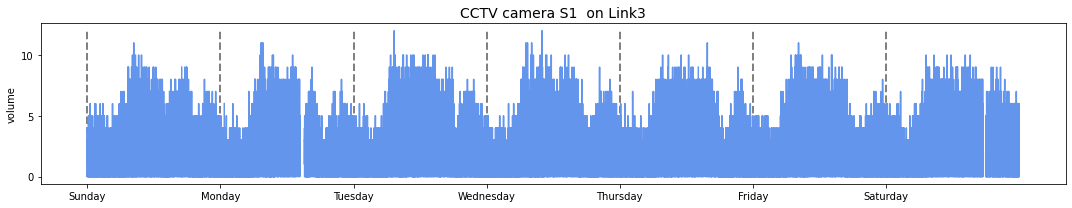

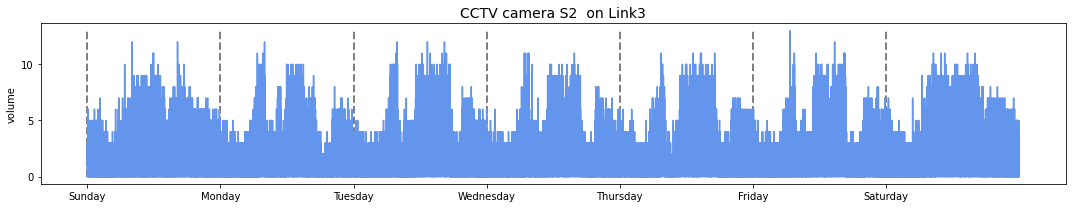

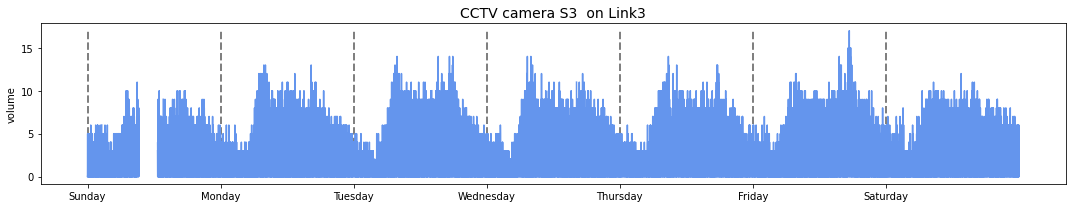

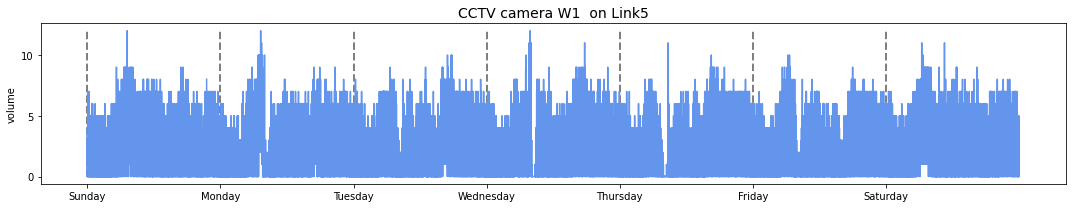

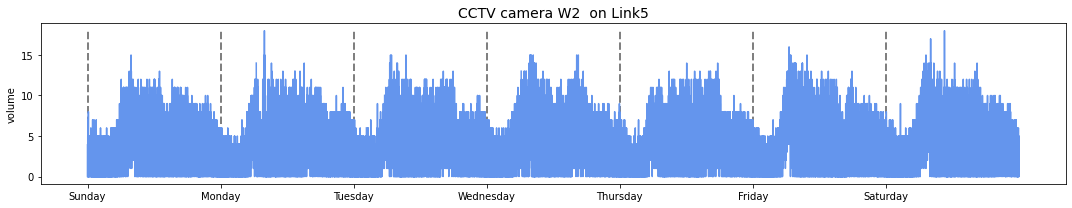

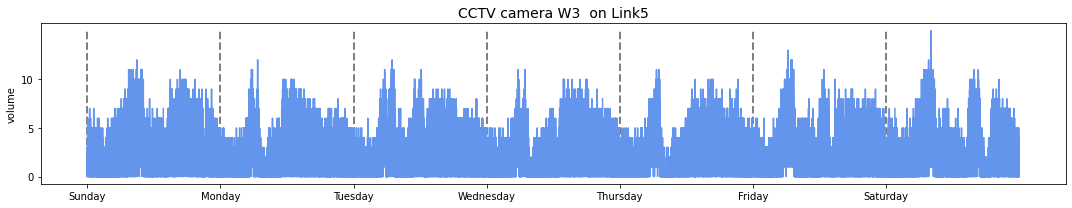

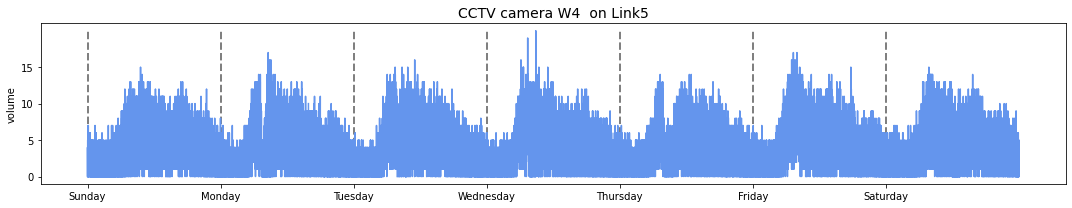

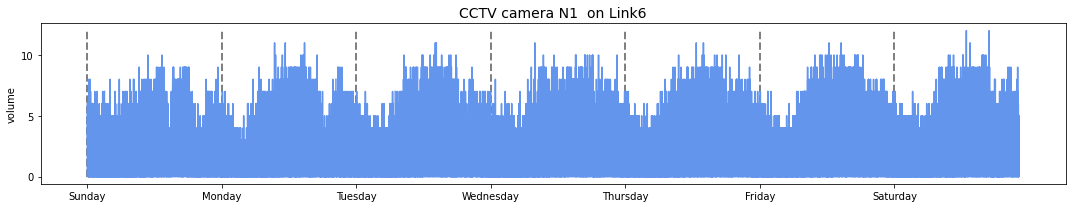

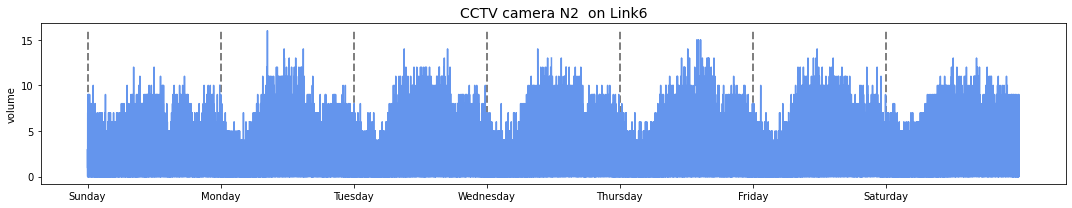

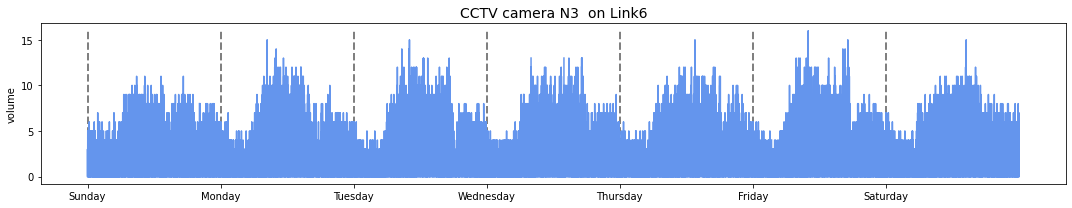

In [ ]:
#define start date to end date
sdate = date(2016, 10, 2)   # start date
edate = date(2016, 10, 8)   # end date
delta = edate - sdate       # as timedelta

cctv={"Link1":["E1", "E2", "E3"],
      "Link3":["S1", "S2", "S3"],
      "Link5":["W1", "W2", "W3","W4"],
      "Link6":["N1", "N2", "N3"]
      }
link_short_name={"Link1":"l1","Link3":"l3","Link5":"l5","Link6":"l6"}
dirpath = '/content/drive/...../'
for link, sensors in cctv.items(): 
    frames = []
    for i in range(delta.days+1):
        day = sdate + timedelta(days=i)  
        convert_day = day.strftime("%Y%m%d")
        link_file = dirpath + '/cctv-camera/'+link+'/'+convert_day+'_volume_'+link_short_name.get(link)+'.csv'
        
        link_df = pd.read_csv(link_file, names=sensors, header=None,skiprows=1)
        frames.append(link_df)

    df = pd.concat(frames)   
    for sensor in sensors:       
        
        x = np.arange(start=0, stop=17280*7, step=17280)#every 5s 
        labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday'] 
 
        df[sensor].plot(figsize=(15,3),legend=None,color='cornflowerblue')
        plt.ylabel('volume')
        plt.yticks(np.arange(0,df[sensor].max(),5))
        plt.xlabel(None)
        plt.xticks(x, labels)         
        plt.title('CCTV camera '+str(sensor)+ '  on '+link,fontsize=14)
        plt.vlines(x=x,ymin=0, ymax=df[sensor].max(), colors='gray', ls='--', lw=2)
        plt.tight_layout()
        plt.show()

10. <b>Weekdays traffic volume from CCTV cameras</b>
<p>We plot traffic volume from CCTV cameras on each link for weekdays on October 2016.</p>

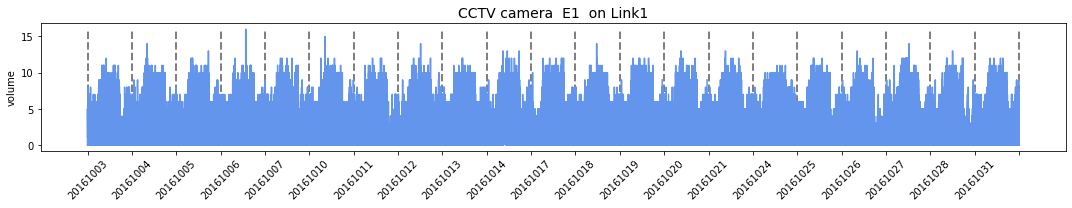

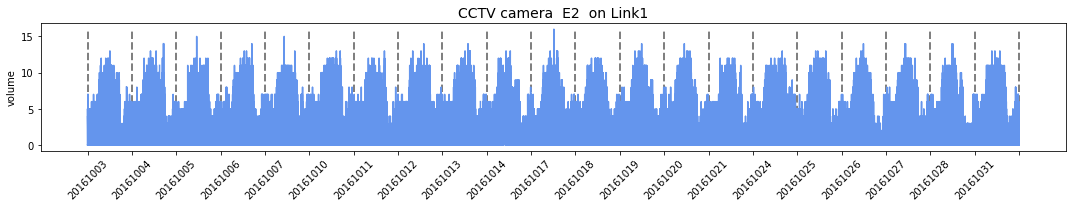

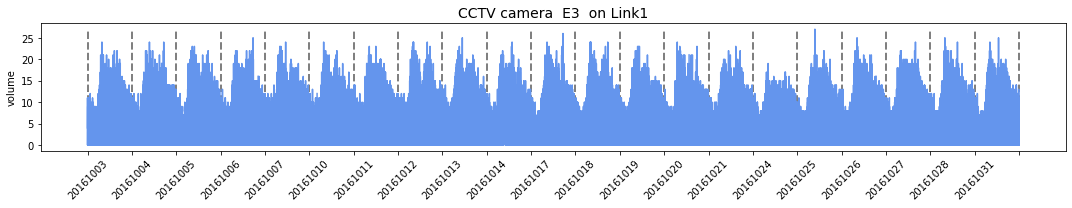

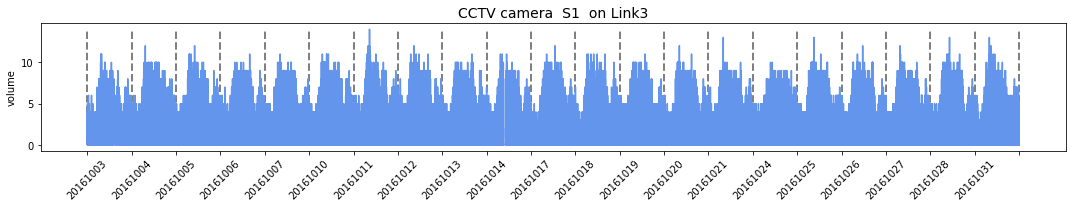

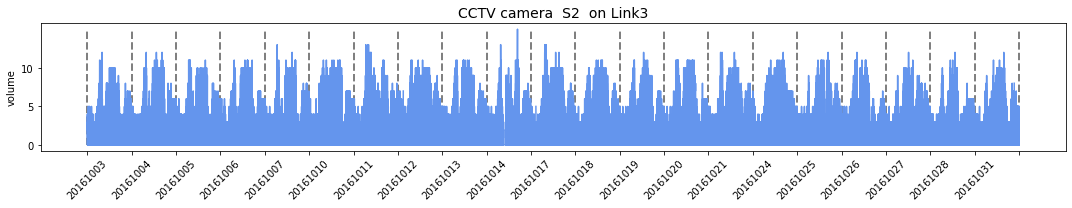

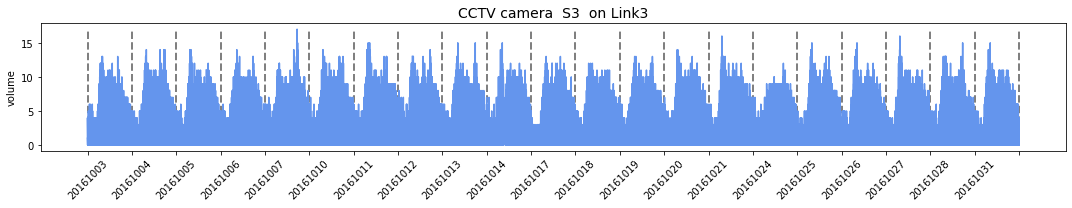

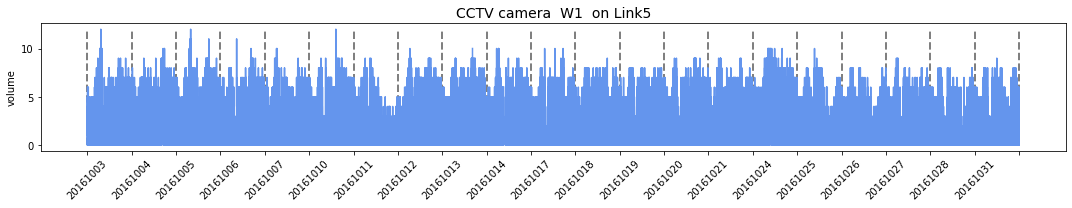

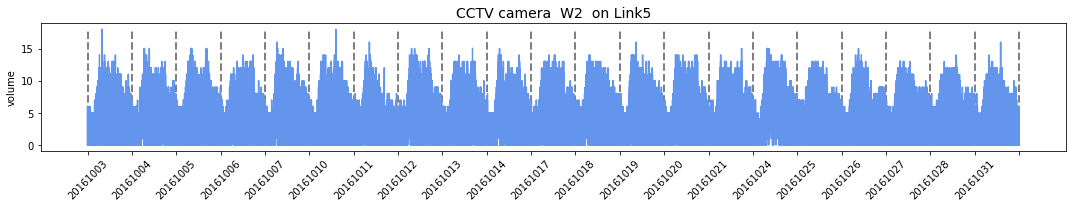

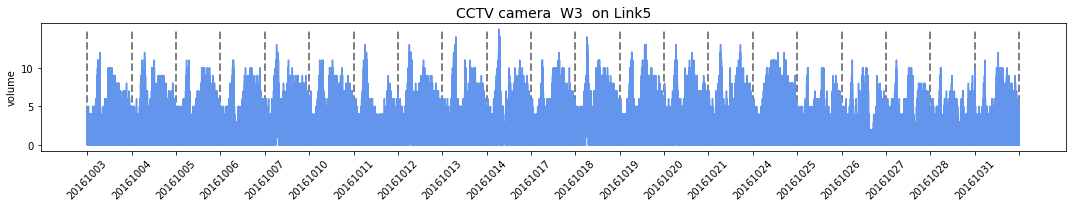

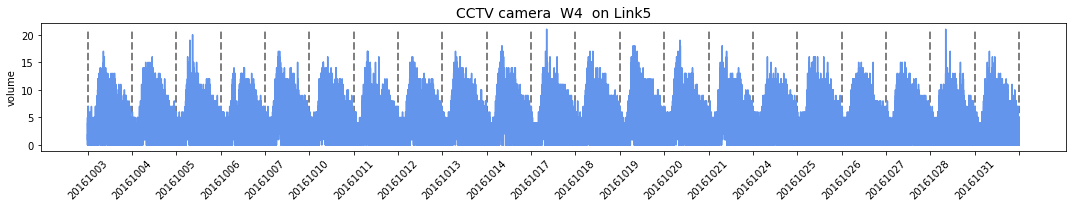

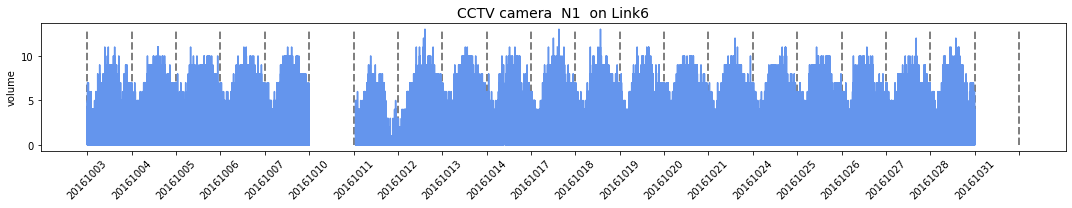

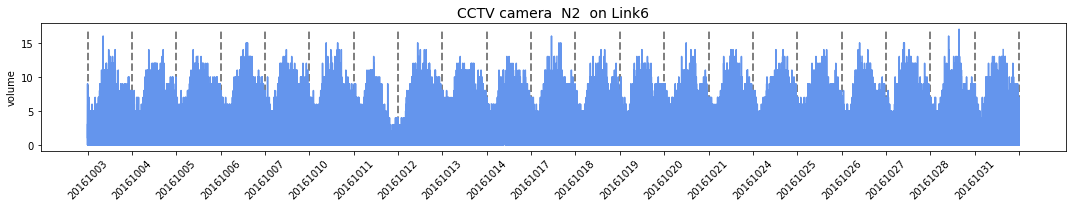

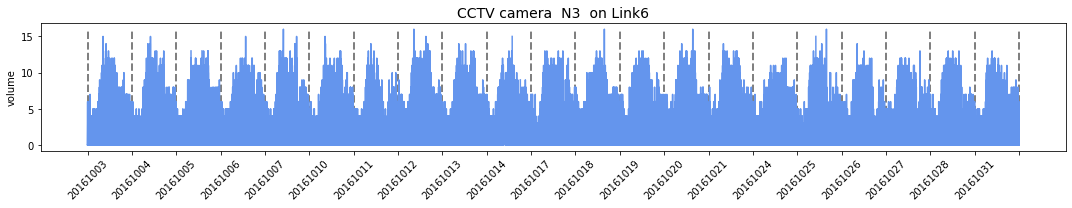

In [ ]:
#define start date to end date
sdate = date(2016, 10, 1)   # start date
edate = date(2016, 10, 31)   # end date
delta = edate - sdate       # as timedelta


cctv={"Link1":["E1", "E2", "E3"],
      "Link3":["S1", "S2", "S3"],
      "Link5":["W1", "W2", "W3","W4"],
      "Link6":["N1", "N2", "N3"]
      }
link_short_name={"Link1":"l1","Link3":"l3","Link5":"l5","Link6":"l6"}
dirpath = '/content/drive/...../'
for link, sensors in cctv.items(): 
    frames = []
    labels =[]
    weekends = [5,6]
    weekDays = ("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")
    for i in range(delta.days+1):
        day = sdate + timedelta(days=i)  
    
        if day.weekday() not in weekends:                    # only weekdays
            convert_day = day.strftime("%Y%m%d")            
            labels.append(convert_day)

            link_file = dirpath + '/cctv-camera/'+link+'/'+convert_day+'_volume_'+link_short_name.get(link)+'.csv'
            link_df = pd.read_csv(link_file, names=sensors, header=None,skiprows=1)

            frames.append(link_df)
    
    for sensor in sensors:  
        df = pd.concat(frames)
        x = np.arange(start=0, stop=17280*22, step=17280)#every 5s 

        
        df[sensor].plot(figsize=(15,3),legend=None,color='cornflowerblue')     
        plt.ylabel('volume')
        plt.yticks(np.arange(0,df[sensor].max(),5))
        plt.xlabel(None)
        plt.xticks(x, labels,rotation=45)         
        plt.title('CCTV camera  '+str(sensor)+ '  on '+link,fontsize=14)
        plt.vlines(x=x,ymin=0, ymax=df[sensor].max(), colors='gray', ls='--', lw=2)
        plt.tight_layout()
        plt.show()

11.<b> Weekends traffic volume from CCTV cameras</b>
<p>We plot traffic volume from CCTV cameras on each link for weekends on October 2016.</p>

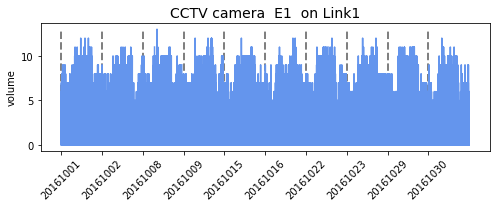

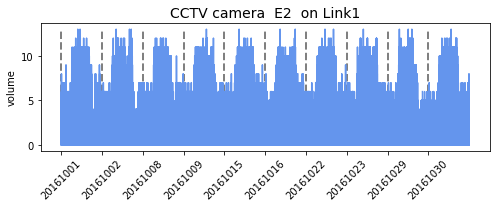

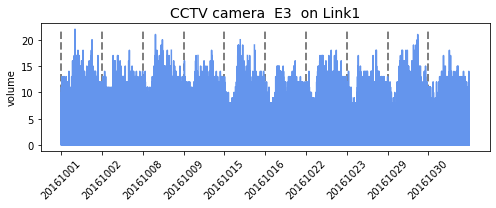

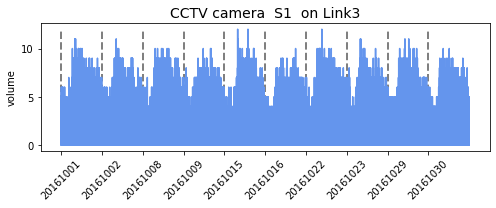

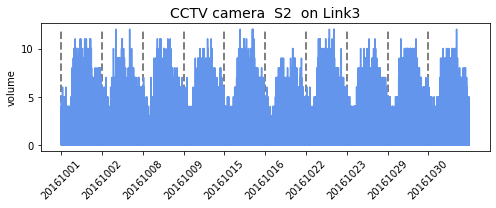

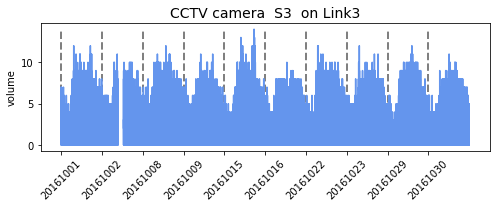

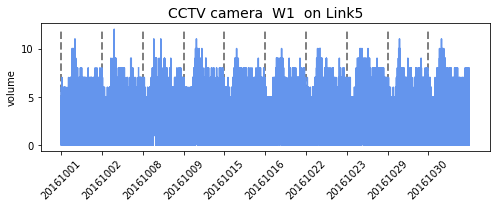

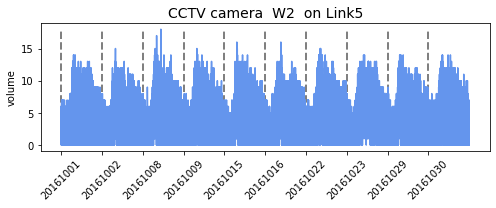

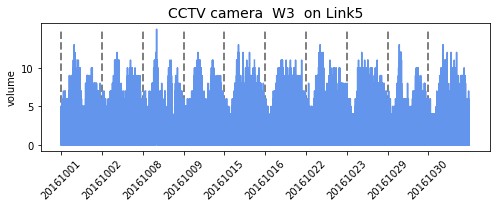

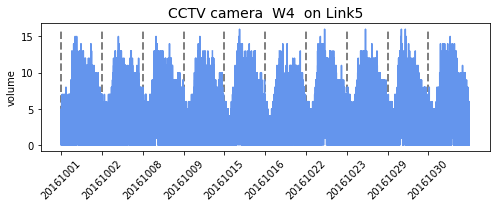

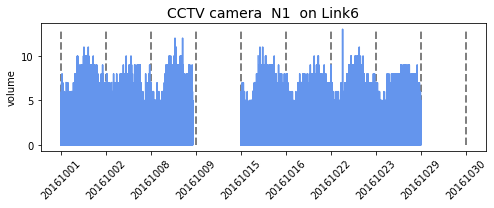

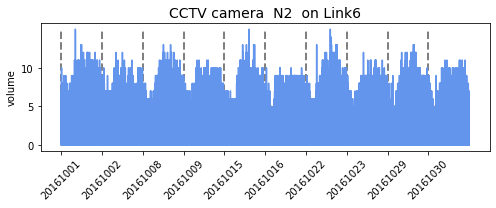

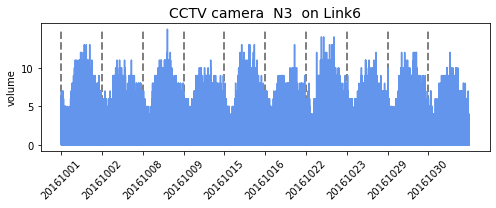

In [ ]:
#define start date to end date
sdate = date(2016, 10, 1)   # start date
edate = date(2016, 10, 31)   # end date
delta = edate - sdate       # as timedelta

cctv={"Link1":["E1", "E2", "E3"],
      "Link3":["S1", "S2", "S3"],
      "Link5":["W1", "W2", "W3","W4"],
      "Link6":["N1", "N2", "N3"]
      }
link_short_name={"Link1":"l1","Link3":"l3","Link5":"l5","Link6":"l6"}
dirpath = '/content/drive/...../'
for link, sensors in cctv.items(): 
    frames = []
    labels =[]
    weekdays = [0,1,2,3,4]
    weekDays = ("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")
    for i in range(delta.days+1):
        day = sdate + timedelta(days=i)  

        if day.weekday() not in weekdays:                    # only weekends
            convert_day = day.strftime("%Y%m%d")
            # labels.append(weekDays[dt.weekday()])
            labels.append(convert_day)
            link_file = dirpath + '/cctv-camera/'+link+'/'+convert_day+'_volume_'+link_short_name.get(link)+'.csv'
            link_df = pd.read_csv(link_file, names=sensors, header=None,skiprows=1)
            frames.append(link_df)
    
    for sensor in sensors:  
        df = pd.concat(frames)
        x = np.arange(start=0, stop=17280*10, step=17280)#every 5s  
        df[sensor].plot(figsize=(7,3),legend=None,color='cornflowerblue')
        plt.ylabel('volume')
        plt.yticks(np.arange(0,df[sensor].max(),5))
        plt.xlabel(None)
        plt.xticks(x, labels,rotation=45)         
        plt.title('CCTV camera  '+str(sensor)+ '  on '+link,fontsize=14)
        plt.vlines(x=x,ymin=0, ymax=df[sensor].max(), colors='gray', ls='--', lw=2)
        plt.tight_layout()
        plt.show()

12. <b>Hourly total traffic volume from CCTV cameras</b>
<p>We plot hourly traffic volume from CCTV cameras on each link on October 2 to 8, 2016.</p>

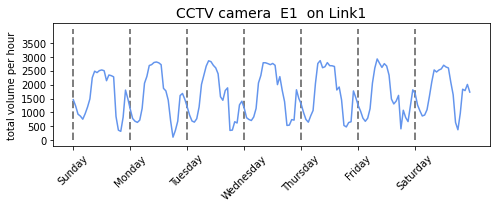

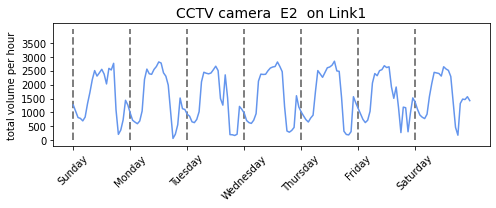

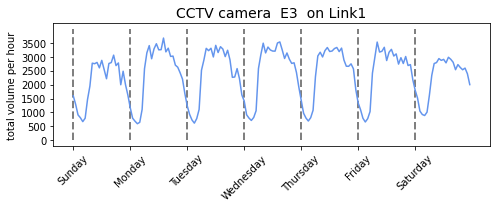

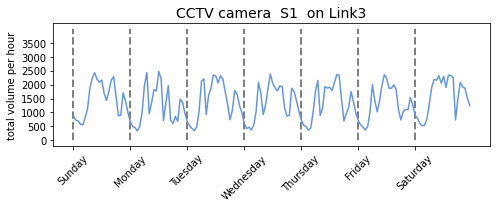

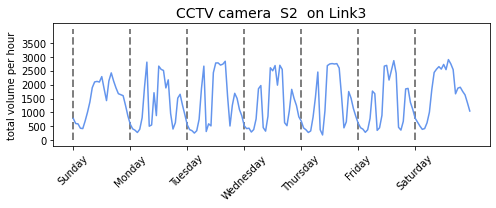

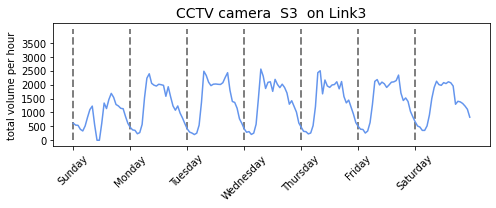

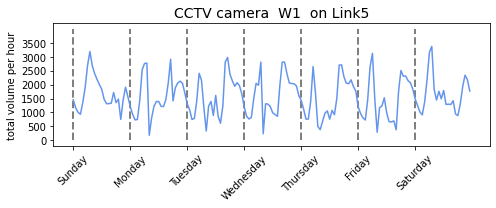

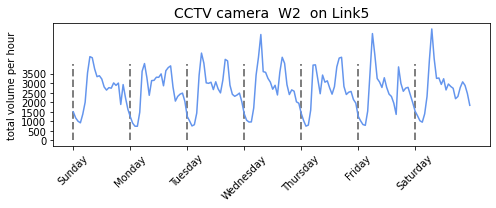

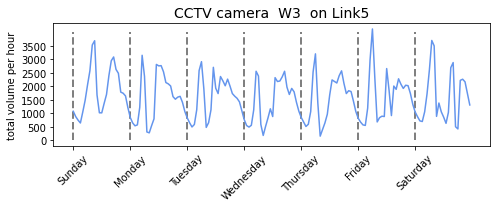

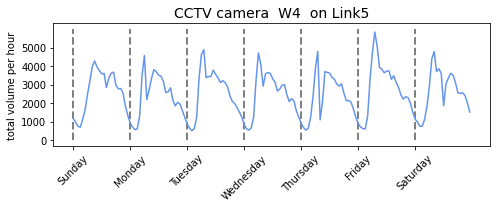

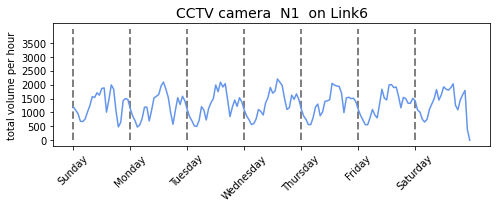

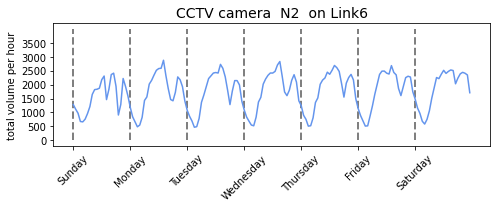

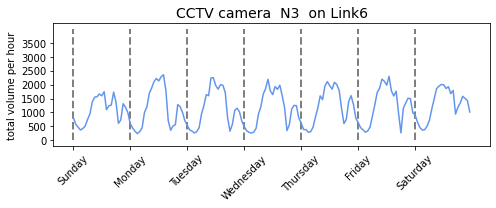

In [ ]:
#define start date to end date
sdate = date(2016, 10, 2)   # start date
edate = date(2016, 10, 8)   # end date
delta = edate - sdate       # as timedelta


cctv={"Link1":["E1", "E2", "E3"],
      "Link3":["S1", "S2", "S3"],
      "Link5":["W1", "W2", "W3","W4"],
      "Link6":["N1", "N2", "N3"]
      }
link_short_name={"Link1":"l1","Link3":"l3","Link5":"l5","Link6":"l6"}
dirpath = '/content/drive/...../'
for link, sensors in cctv.items(): 
    frames = []
    for i in range(delta.days+1):
        day = sdate + timedelta(days=i)  
        convert_day = day.strftime("%Y%m%d")
    
        link_file = dirpath + '/cctv-camera/'+link+'/'+convert_day+'_volume_'+link_short_name.get(link)+'.csv'
        link_df = pd.read_csv(link_file)
        
        link_df = link_df.set_index(pd.DatetimeIndex(link_df['Time']))            
        link_df = link_df.iloc[:].groupby([lambda x: x.strftime("%H")]).sum()
        frames.append(link_df)

    for sensor in sensors:  
        df = pd.concat(frames)
        x = np.arange(start=0, stop=24*7, step=24) #every one hour
        labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday'] 
        df[sensor].plot(figsize=(7,3),legend=None,color='cornflowerblue')
        plt.ylabel('total volume per hour')        
        plt.xlabel(None)
        plt.xticks(x, labels, rotation = 45)         
        plt.title('CCTV camera  '+str(sensor)+ '  on '+link,fontsize=14)
        if sensor == 'W4':
            plt.yticks(np.arange(0, 6000, 1000))
            plt.vlines(x=x,ymin=0, ymax=6000, colors='gray', ls='--', lw=2)
        else:
            plt.yticks(np.arange(0, 4000, 500))
            plt.vlines(x=x,ymin=0, ymax=4000, colors='gray', ls='--', lw=2)
        plt.tight_layout()
        plt.show()

13. <b>Daily  total traffic volume from CCTV cameras on weekday</b>
<p>We plot daily traffic volume from CCTV cameras on each link for weekdays on October 2016.</p>

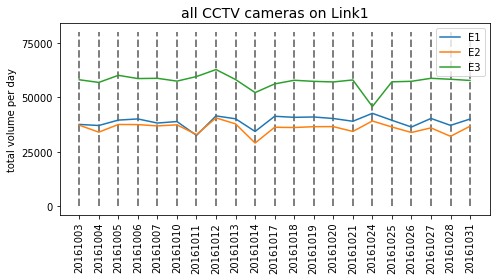

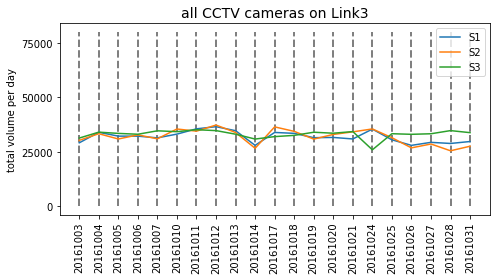

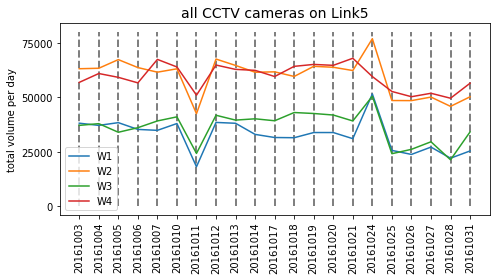

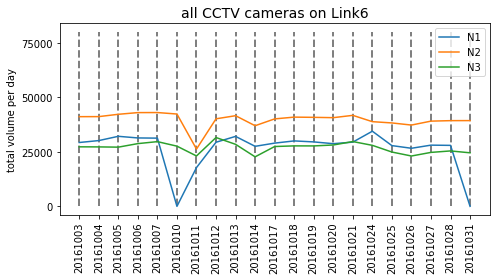

In [ ]:
#define start date to end date
sdate = date(2016, 10, 1)   # start date
edate = date(2016, 10, 31)   # end date
delta = edate - sdate       # as timedelta

cctv={"Link1":["E1", "E2", "E3"],
      "Link3":["S1", "S2", "S3"],
      "Link5":["W1", "W2", "W3","W4"],
      "Link6":["N1", "N2", "N3"]
      }
link_short_name={"Link1":"l1","Link3":"l3","Link5":"l5","Link6":"l6"}
dirpath = '/content/drive/...../'
for link, sensors in cctv.items(): 
    frames = []
    labels =[]
    weekends = [5,6]
    weekDays = ("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")
    for i in range(delta.days+1):
        day = sdate + timedelta(days=i)  
        if day.weekday() not in weekends:                    # only weekdays
            convert_day = day.strftime("%Y%m%d")
            labels.append(convert_day)
            link_file = dirpath + '/cctv-camera/'+link+'/'+convert_day+'_volume_'+link_short_name.get(link)+'.csv'
            link_df = pd.read_csv(link_file)
            
            link_df = link_df.set_index(pd.DatetimeIndex(link_df['Time']))
            link_df = link_df.iloc[:].groupby([lambda x: x.strftime("%d")]).sum()
            frames.append(link_df)
     
    df = pd.concat(frames)
    x = np.arange(start=0, stop=1*21, step=1)#every 24 hours 

    df.plot(figsize=(7,4))
    plt.ylabel('total volume per day')
    plt.yticks(np.arange(0,80000,25000))
    plt.xlabel(None)
    plt.legend(loc='best')
    plt.xticks(x, labels,rotation=90)         
    plt.title('all CCTV cameras on '+link,fontsize=14)
    plt.vlines(x=x,ymin=0, ymax=80000, colors='gray', ls='--', lw=2)
    plt.tight_layout()
    plt.show()

14. <b>Daily  total traffic volume from CCTV cameras on weekend</b>
<p>We plot daily traffic volume from CCTV cameras on each link for weekends on October 2016.</p>

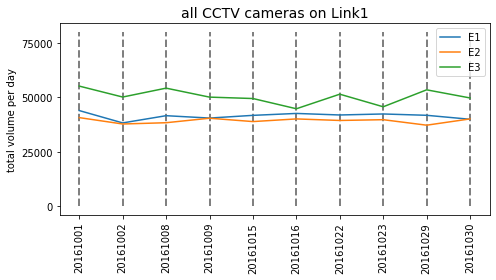

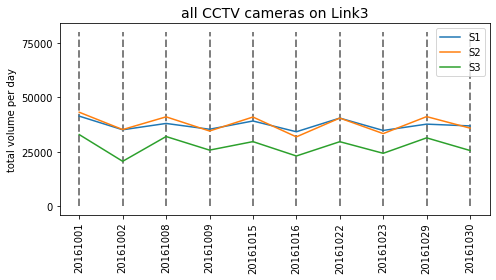

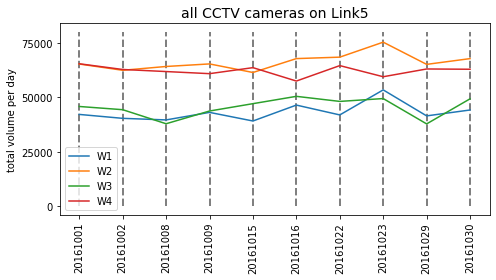

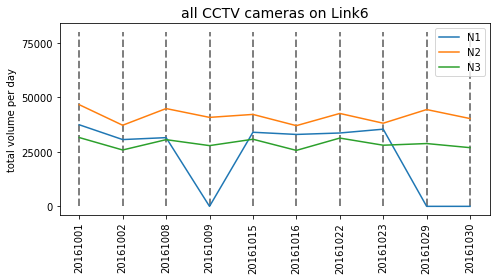

In [ ]:
#define start date to end date
sdate = date(2016, 10, 1)   # start date
edate = date(2016, 10, 31)   # end date
delta = edate - sdate       # as timedelta

cctv={"Link1":["E1", "E2", "E3"],
      "Link3":["S1", "S2", "S3"],
      "Link5":["W1", "W2", "W3","W4"],
      "Link6":["N1", "N2", "N3"]
      }
link_short_name={"Link1":"l1","Link3":"l3","Link5":"l5","Link6":"l6"}
dirpath = '/content/drive/...../'
for link, sensors in cctv.items(): 
    frames = []
    labels =[]
    weekends = [5,6]
    weekDays = ("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")
    for i in range(delta.days+1):
        day = sdate + timedelta(days=i)  
        if day.weekday() in weekends:                    # only weekdays
            convert_day = day.strftime("%Y%m%d")
            labels.append(convert_day)
            link_file = dirpath + '/cctv-camera/'+link+'/'+convert_day+'_volume_'+link_short_name.get(link)+'.csv'
            link_df = pd.read_csv(link_file)
            
            link_df = link_df.set_index(pd.DatetimeIndex(link_df['Time']))
            link_df = link_df.iloc[:].groupby([lambda x: x.strftime("%d")]).sum()
            frames.append(link_df)
      
    df = pd.concat(frames)
    x = np.arange(start=0, stop=1*10, step=1)#every 24 hours 

    df.plot(figsize=(7,4))
    plt.ylabel('total volume per day')
    plt.yticks(np.arange(0,80000,25000))
    plt.xlabel(None)
    plt.legend(loc='best')
    plt.xticks(x, labels,rotation=90)         
    plt.title('all CCTV cameras on '+link,fontsize=14)
    plt.vlines(x=x,ymin=0, ymax=80000, colors='gray', ls='--', lw=2)
    plt.tight_layout()
    plt.show()

15. <b>Missing percentage of traffic volume from CCTV cameras</b>
<p>Firstly, we merge the data from CCTV cameras for each month. </p>

In [ ]:
import calendar
import os
available = { 
            2016 : [9,10, 11, 12],
            2017 : [1,2,3,4,5,6,7,8,9,10,11, 12],
            2018 : [1,2,3,4,5,6,7,8,9,10,11,12],
            2019 : [1,2,3,4,5,6,7,8,9]
             }
cctv={"Link1":["E1", "E2", "E3"],
      "Link3":["S1", "S2", "S3"],
      "Link5":["W1", "W2", "W3","W4"],
      "Link6":["N1", "N2", "N3"]
      }
link_short_name = {"Link1": "l1", "Link3": "l3", "Link5": "l5", "Link6": "l6"}
dirpath = '/content/drive/...../'
os.makedirs(dirpath + '/cctv-camera-monthly' ,exist_ok=True)
for year, months in available.items():

    for month in months:

        _, num_days = calendar.monthrange(year, month)
        # print(num_days)
        # define start date to end date
        sdate = date(year, month, 1)  # start date
        edate = date(year, month, num_days)  # end date
        delta = edate - sdate  
        for link, sensors in cctv.items(): 
            frames = []
            for i in range(delta.days+1):
                day = sdate + timedelta(days=i)  
                convert_day = day.strftime("%Y%m%d")
                link_file = dirpath + '/cctv-camera/'+link+'/'+convert_day+'_volume_'+link_short_name.get(link)+'.csv'
                # print(link_file)
                if os.path.isfile(link_file):
                    link_df = pd.read_csv(link_file)
                    frames.append(link_df)

            result = pd.concat(frames)
            result.to_csv(dirpath + '/cctv-camera-monthly/'+link+'-'+str(year)+'-'+calendar.month_name[month]+'.csv', index=False, sep=',')

<p>We count the missing percentage for each month. </p>

In [ ]:
available = {
    2016 : [9,10, 11, 12],
    2017 : [1,2,3,4,5,6,7,8,9,10,11,12],
    2018: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    2019: [1, 2, 3, 4, 5, 6, 7, 8, 9]
}

cctv = {"Link1": ["E1", "E2", "E3"],
        "Link3": ["S1", "S2", "S3"],
        "Link5": ["W1", "W2", "W3", "W4"],
        "Link6": ["N1", "N2", "N3"]
        }
link_short_name = {"Link1": "l1", "Link3": "l3", "Link5": "l5", "Link6": "l6"}
dirpath = '/content/drive/...../'
os.makedirs(dirpath + '/cctv-camera-missingdata' ,exist_ok=True)
for link, sensors in cctv.items():
    file = open(dirpath + "/cctv-camera-missingdata/"+ link + "-missingCCTV.csv", "w", newline='')
    writer = csv.writer(file, delimiter=",")
    writer.writerow(["month-year", *sensors]) 

    for year, months in available.items():
        for month in months:
            link_file = dirpath + '/cctv-camera-monthly/' + link + '-' + str(year) + '-' + calendar.month_name[month] + '.csv'
        
            if os.path.isfile(link_file):
                link_df = pd.read_csv(link_file)
                percent_missing= ((link_df[sensors].isnull() | link_df[sensors].isna()).sum() * 100 / len(link_df)).round(2)
                missing_value_df = pd.DataFrame({'column_name': sensors,'percent_missing': percent_missing})
                temp = []
                for index,row in missing_value_df.iterrows():
                    temp.append(row['percent_missing'])

                writer.writerow([str(year) +'-'+calendar.month_name[month], *temp])
    file.close()

<p>We plot missing percentage of traffic volume for all CCTV cameras. </p>

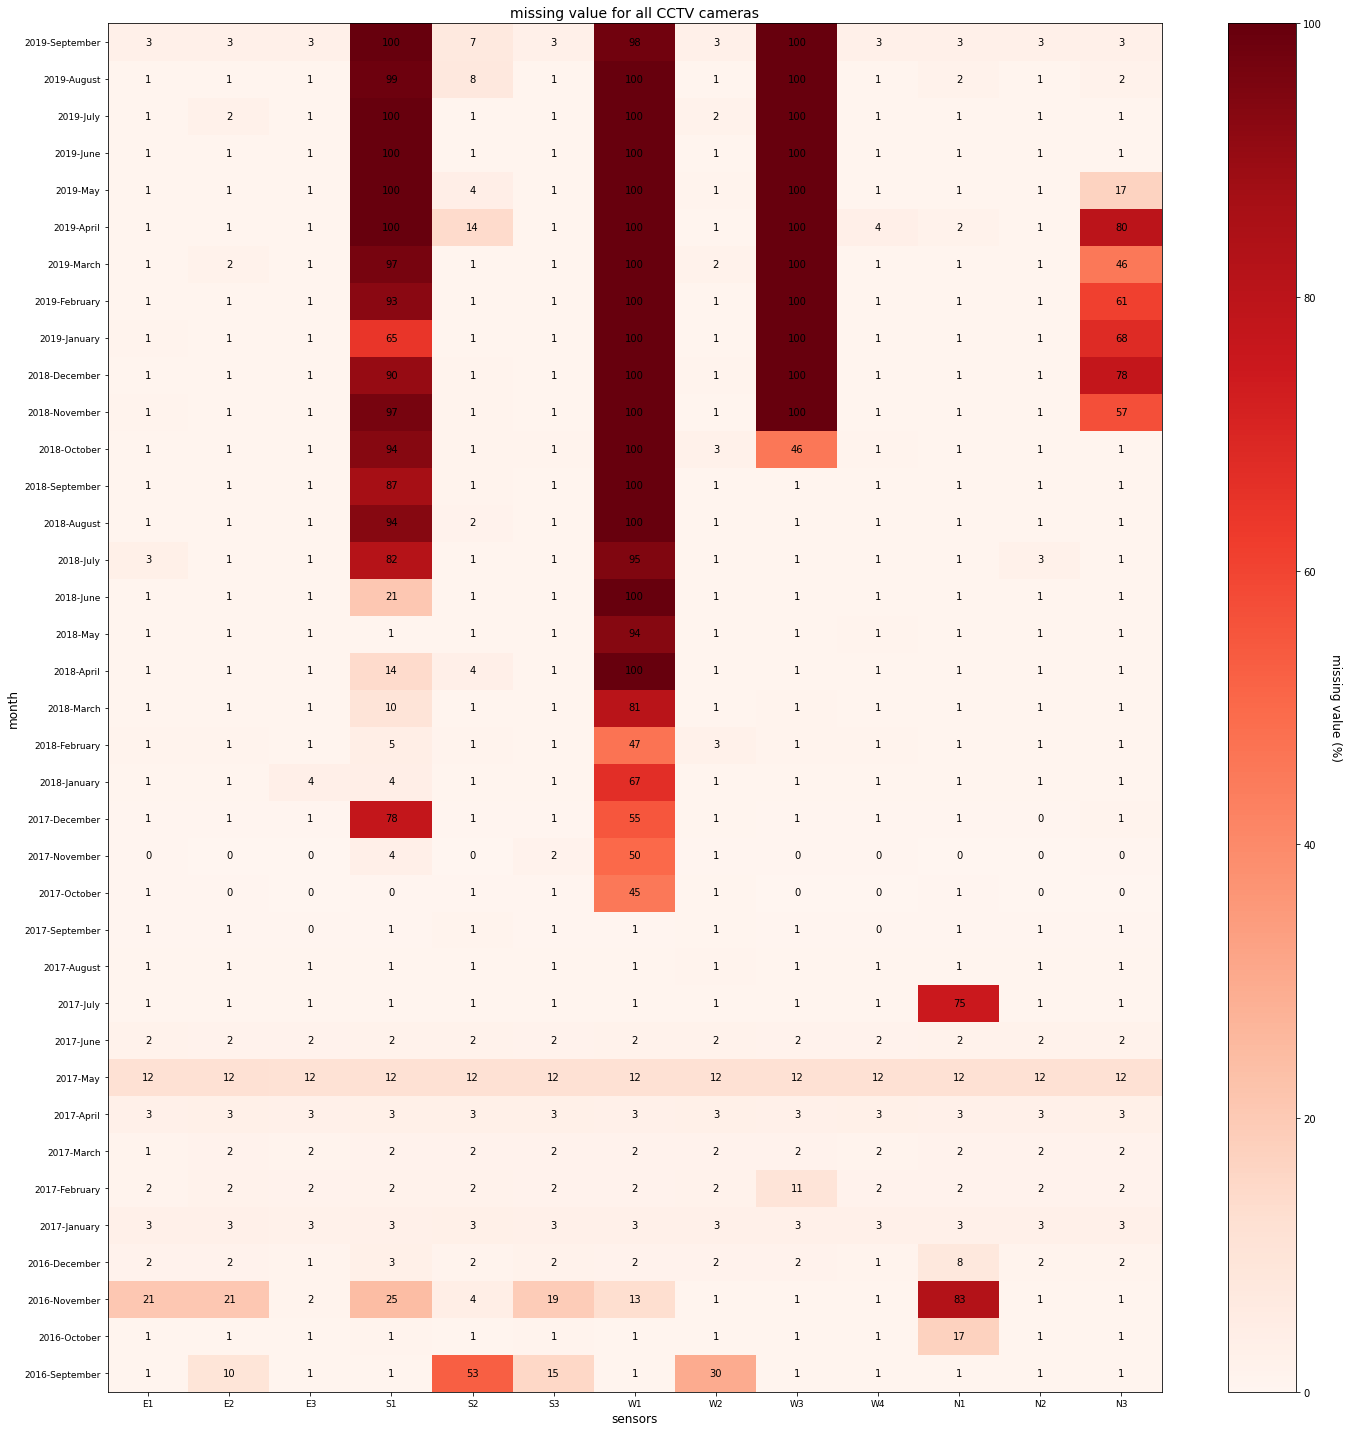

In [ ]:
dirpath = '/content/drive/...../'

cctv = {"Link1": ["E1", "E2", "E3"],
        "Link3": ["S1", "S2", "S3"],
        "Link5": ["W1", "W2", "W3", "W4"],
        "Link6": ["N1", "N2", "N3"]
        }
frames = []
for link, sensors in cctv.items():    
    missing_percent_file = pd.read_csv(dirpath + '/cctv-camera-missingdata/'+ link + '-missingCCTV.csv')    
    frames.append(missing_percent_file)

df = pd.concat(frames,axis=1)
df = df.loc[:,~df.columns.duplicated()]

df = df.set_index((df['month-year']))

columns  = df.columns.tolist()
columns.pop(0)

fig, axis = plt.subplots()
heatmap = axis.pcolor(df[columns], cmap='Reds', vmin=0, vmax=100)

df[columns] = df[columns].apply(pd.to_numeric)
for y in range(np.array(df[columns]).shape[0]):
    for x in range(np.array(df[columns]).shape[1]):
        plt.text(x + 0.5, y + 0.5, '%.0f' % np.array(df[columns])[y, x], horizontalalignment='center', verticalalignment='center', color='black')

axis.set_yticks(np.arange(np.array(df[columns]).shape[0]) + 0.5, minor=False)
axis.set_xticks(np.arange(np.array(df[columns]).shape[1]) + 0.5, minor=False)

axis.set_yticklabels(df['month-year'], minor=False, fontsize=9)
axis.set_xticklabels(columns, minor=False, fontsize=9)
axis.set_title("missing value for all CCTV cameras", fontsize=14)
axis.set_xlabel("sensors", fontsize=12)
axis.set_ylabel("month", fontsize=12)

fig.set_size_inches(20, 20)
cbar=plt.colorbar(heatmap)
cbar.set_label('missing value (%)', rotation=270,fontsize=12,labelpad=20)
cbar.ax.tick_params(labelsize=10)
plt.tight_layout()
plt.show()

16. <b>Estimate queue length using traffic volume from CCTV camera</b>
<p>Traffic volume from CCTV cameras has missing values. Here, we have applied interpolation method for missing values.</p>

In [ ]:
# define start date to end date
sdate = date(2016, 10, 1)  # start date
edate = date(2016, 10, 1)  # end date
delta = edate - sdate  # as timedelta

cctv = {"Link1": ["E1", "E2", "E3"],
        "Link3": ["S1", "S2", "S3"],
        "Link5": ["W1", "W2", "W3", "W4"],
        "Link6": ["N1", "N2", "N3"]
        }
link_short_name = {"Link1": "l1", "Link3": "l3", "Link5": "l5", "Link6": "l6"}
dirpath = '/content/drive/...../'
os.makedirs(dirpath + '/cctv-camera-interpolated' )
for link, sensors in cctv.items():
    for i in range(delta.days + 1):
        day = sdate + timedelta(days=i)
        convert_day = day.strftime("%Y%m%d")
        link_file = dirpath + '/cctv-camera/' + link + '/' + convert_day + '_volume_' + link_short_name.get(link) + '.csv'
        if (os.path.isfile(link_file)):
            link_df = pd.read_csv(link_file)
            
            link_df[sensors] = link_df[sensors].interpolate(method='linear')
            link_df[sensors] = link_df[sensors].__round__(0)
            os.makedirs(dirpath + '/cctv-camera-interpolated/'  + link )
            link_df.to_csv(dirpath + '/cctv-camera-interpolated/'  + link + '/' + convert_day + '_volume_' + link_short_name.get(link) + '.csv',index=False, sep=',')

<b>Estimate queue length using interpolated traffic volume from CCTV camera</b>

In [ ]:
# define start date to end date
sdate = date(2016, 10, 1)  # start date
edate = date(2016, 10, 1)  # end date
delta = edate - sdate  # as timedelta

cctv = {"Link1": ["E1", "E2", "E3"],
        "Link3": ["S1", "S2", "S3"],
        "Link5": ["W1", "W2", "W3", "W4"],
        "Link6": ["N1", "N2", "N3"]
        }
# location of each sensor in meters
cctv_loc = {"Link1": [450,780,1200],
        "Link3": [200,550,1140],
        "Link5": [210,500,1800,2500],
        "Link6": [140,430,770]
        }
link_short_name = {"Link1": "l1", "Link3": "l3", "Link5": "l5", "Link6": "l6"}
dirpath = '/content/drive/...../'
os.makedirs(dirpath + '/cctv-camera-interpolated-queue' )
for link, sensors in cctv.items():
    for i in range(delta.days + 1):
        day = sdate + timedelta(days=i)
        convert_day = day.strftime("%Y%m%d")
        print(convert_day)
        link_file = dirpath + '/cctv-camera-interpolated/' + link + '/' + convert_day + '_volume_' + link_short_name.get(link) + '.csv'
        if (os.path.isfile(link_file)):
            link_df = pd.read_csv(link_file)
            queue_df = pd.DataFrame()

            for i in range(len(sensors)):
                temp = []
                for x in range(len(link_df)):
                    # location of each sensors in meter
                    sensors_loc = cctv_loc.get(link)
                    if i == 0:
                        fin = link_df.loc[x][sensors[i]]
                        if fin > 0:
                            new_queue = sensors_loc[i] + (fin * 4.62 + (fin - 1) * 2.37) # 4.62 is length of vehicle and 2.37 is gap betweeen vehicles
                        else:
                            new_queue = sensors_loc[i]

                    else:
                        if len(temp)== 0:
                            old_queue = 0
                        else:

                            old_queue   = temp[len(temp)-1]
                        fin     = link_df.loc[x][sensors[i]]
                        fout    = link_df.loc[x][sensors[i-1]]


                        dist_bet_sensors = sensors_loc[i]-sensors_loc[i-1]

                        new_queue    = min(dist_bet_sensors , max(0, old_queue + (fin * 4.62 + (fin - 1) * 2.37) - (fout * 4.62 + (fout-1) * 2.37)))
                        # print(fin, fout, disst_bet_sensors, old_queue, new_queue)
                    temp.append(new_queue)

                queue_df [sensors[i]] = temp

            link_df['Time'] = pd.to_datetime(link_df['Time']).dt.strftime("%H:%M:%S")

            queue_df['total'] = queue_df.iloc[:, :].sum(axis=1)
            queue_df.insert(0, 'Time', link_df['Time'])
            os.makedirs(dirpath + '/cctv-camera-interpolated-queue/'  + link )
            queue_df.to_csv(dirpath + '/cctv-camera-interpolated-queue/' + link + '/' + convert_day + '_ql_' + link_short_name.get(
            link) + '.csv', index=False)

20161001
20161001
20161001
20161001


<p>We plot total queue length for all sensors on each link (Link 1, Link 3, Link 5 and Link 6) for morning rush hours.</p>

Index(['Time', 'E1', 'E2', 'E3', 'total'], dtype='object')
Index(['Time', 'S1', 'S2', 'S3', 'total'], dtype='object')
Index(['Time', 'W1', 'W2', 'W3', 'W4', 'total'], dtype='object')
Index(['Time', 'N1', 'N2', 'N3', 'total'], dtype='object')


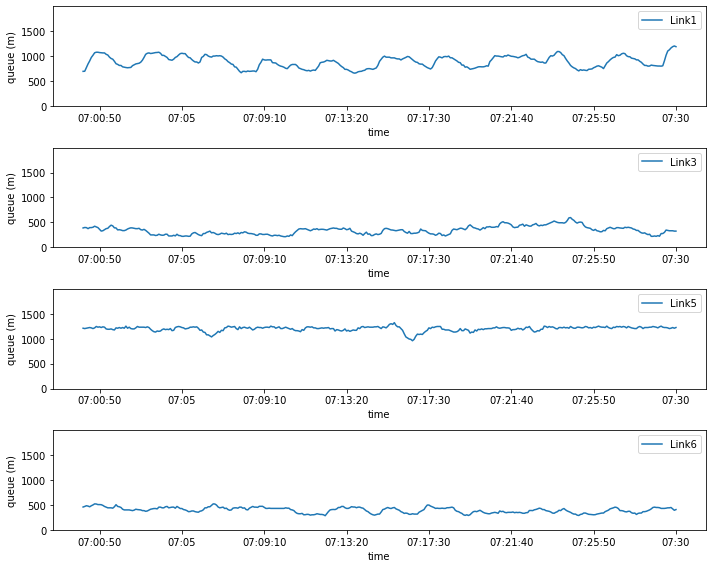

In [ ]:
# define start date to end date
sdate = date(2016, 10, 1)  # start date
edate = date(2016, 10, 1)  # end date
delta = edate - sdate  # as timedelta

cctv = {"Link1": ["E1", "E2", "E3"],
        "Link3": ["S1", "S2", "S3"],
        "Link5": ["W1", "W2", "W3", "W4"],
        "Link6": ["N1", "N2", "N3"]
        }

link_short_name = {"Link1": "l1", "Link3": "l3", "Link5": "l5", "Link6": "l6"}
dirpath = '/content/drive/...../'

fig, ax = plt.subplots(4, 1, figsize=(10, 8), sharey=True)

for i in range(delta.days + 1):
    day = sdate + timedelta(days=i)
    convert_day = day.strftime("%Y%m%d")

    index = 0
    for link, sensors in cctv.items():
        
        link_file = dirpath + "/cctv-camera-interpolated-queue/"+link+"/"+convert_day+"_ql_"+link_short_name.get(link)+".csv"

        if (os.path.isfile(link_file)):
            link_df = pd.read_csv(link_file)

            link_df = link_df[['Time',*sensors,'total']]
            link_df['Time'] = pd.to_datetime(link_df['Time'], format='%H:%M:%S').dt.time
            link_df = link_df[(link_df['Time'] >= dt.time(7, 0, 0)) &  (link_df['Time'] <= dt.time(7, 30, 0))]
            link_df = link_df.set_index(link_df['Time'])

            print(link_df.columns)
            ax[index].set_yticks(np.arange(0, 2000, 500))
            link_df['total'].plot (ax= ax[index])
            ax[index].legend([link], loc='upper right')
            ax[index].set_xlabel('time')
            ax[index].set_ylabel('queue (m)')
            ax[i].set_ylim(0, 2000)
            index +=1

    plt.tight_layout()
    plt.show()

<p>We plot total queue length for all sensors on each link (Link 1, Link 3, Link 5 and Link 6) for evening rush hours.</p>

Index(['Time', 'E1', 'E2', 'E3', 'total'], dtype='object')
Index(['Time', 'S1', 'S2', 'S3', 'total'], dtype='object')
Index(['Time', 'W1', 'W2', 'W3', 'W4', 'total'], dtype='object')
Index(['Time', 'N1', 'N2', 'N3', 'total'], dtype='object')


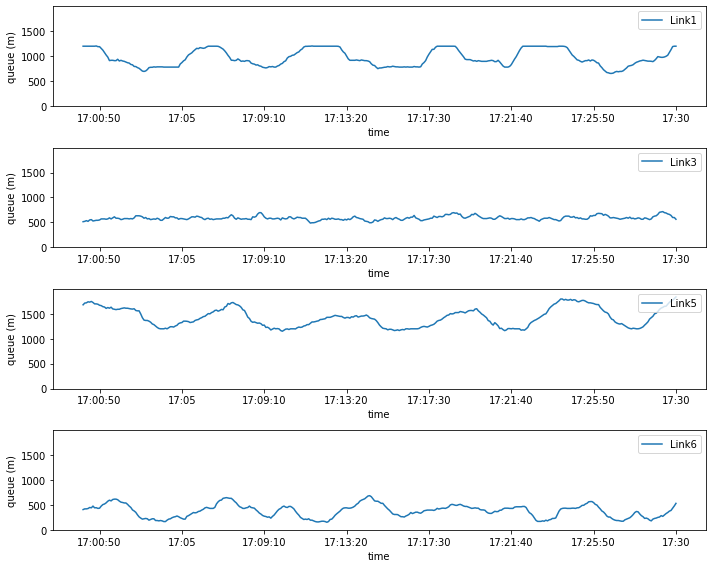

In [ ]:
# define start date to end date
sdate = date(2016, 10, 1)  # start date
edate = date(2016, 10, 1)  # end date
delta = edate - sdate  # as timedelta

cctv = {"Link1": ["E1", "E2", "E3"],
        "Link3": ["S1", "S2", "S3"],
        "Link5": ["W1", "W2", "W3", "W4"],
        "Link6": ["N1", "N2", "N3"]
        }

link_short_name = {"Link1": "l1", "Link3": "l3", "Link5": "l5", "Link6": "l6"}
dirpath = '/content/drive/...../'

fig, ax = plt.subplots(4, 1, figsize=(10, 8), sharey=True)

for i in range(delta.days + 1):
    day = sdate + timedelta(days=i)
    convert_day = day.strftime("%Y%m%d")

    index = 0
    for link, sensors in cctv.items():
        
        link_file = dirpath + "/cctv-camera-interpolated-queue/"+link+"/"+convert_day+"_ql_"+link_short_name.get(link)+".csv"

        if (os.path.isfile(link_file)):
            link_df = pd.read_csv(link_file)

            link_df = link_df[['Time',*sensors,'total']]
            link_df['Time'] = pd.to_datetime(link_df['Time'], format='%H:%M:%S').dt.time
            link_df = link_df[(link_df['Time'] >= dt.time(17, 0, 0)) &  (link_df['Time'] <= dt.time(17, 30, 0))]
            link_df = link_df.set_index(link_df['Time'])

            print(link_df.columns)
            ax[index].set_yticks(np.arange(0, 2000, 500))
            link_df['total'].plot (ax= ax[index])
            ax[index].legend([link], loc='upper right')
            ax[index].set_xlabel('time')
            ax[index].set_ylabel('queue (m)')
            ax[i].set_ylim(0, 2000)
            index +=1

    plt.tight_layout()
    plt.show()

17. <b>Taxi trajectory</b>
<p>We plot taxi trajectory data in the Sathorn road area in all six evaluation days during social experiment.</p>

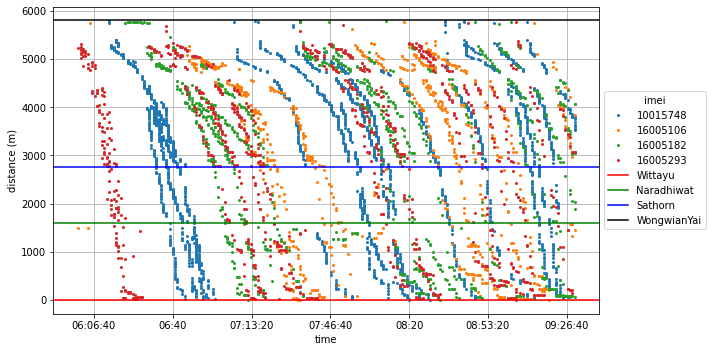

In [ ]:
dirpath = '/content/drive/...../'

df = pd.read_csv(dirpath+'/Taxi_ground_truth_speed_RAWDATA.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'], format = '%m/%d/%Y %H:%M').dt.time
df = df.set_index(['timestamp'])
groups = df.groupby("imei")

fig, ax = plt.subplots(figsize=(10,5))
for name, group in groups:
    
    group["distance from endpoint"].plot(marker="o", linestyle="", label=name , markersize= 2)    

plt.axhline(y= 0 , color='r', linestyle='-', label = 'Wittayu')
plt.axhline(y= 1600 , color='g', linestyle='-', label = 'Naradhiwat')
plt.axhline(y= 2760 , color='b', linestyle='-', label = 'Sathorn')
plt.axhline(y= 5806 , color='black', linestyle='-', label = 'WongwianYai')  
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = 'imei')
plt.ylabel('distance (m)')
plt.xlabel('time')
plt.tight_layout()
plt.grid()
plt.show()

18. <b>Taxi speed</b>
<p>We plot taxi speed of Link 1 and Link 5 from 6 AM to 9:30 AM.</p>

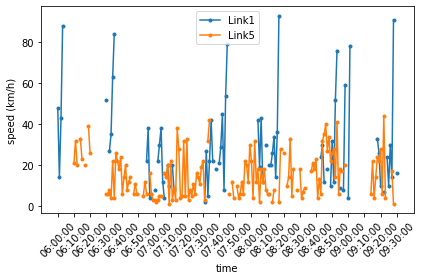

In [ ]:
dirpath = '/content/drive/...../'

l1path = dirpath + "/taxi-data/20160602_Link1.csv"
l5path = dirpath + "/taxi-data/20160602_Link5.csv"

l1 = pd.read_csv(l1path, sep =',')
l5 = pd.read_csv(l5path, sep =',')

s1 = l1[l1['speed'] !=0]
s1 = s1[['time','speed']]

s5 = l5[l5['speed'] !=0]
s5 = s5[['time','speed']]

fig, ax = plt.subplots(1,1)

ax.plot(s1['speed'].values.tolist(), label = 'Link1',marker='.')
ax.plot(s5['speed'].values.tolist(), label = 'Link5',marker='.')

ax.set_xticks(np.arange(0, len(s1['time']),10))
ax.set_xticklabels(s1['time'].values[::10], rotation=45)

ax.set_yticks(np.arange(0, max(s1['speed']), 20))
plt.legend(loc="best")

plt.xlabel('time')
plt.ylabel('speed (km/h)')

plt.tight_layout()
plt.show()

19. <b>Taxi speed and traffic volume from thermal cameras</b>
<p>We plot correlation of traffic volume from thermal cameras and speed.</p>

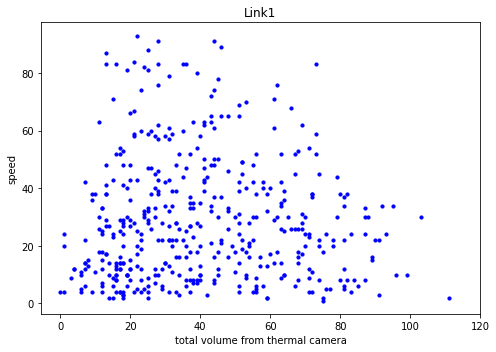

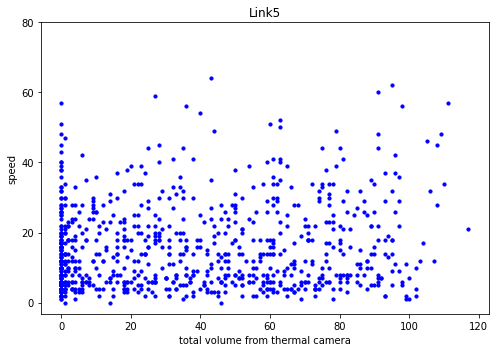

In [ ]:
thermal = {
    'Link1': [10, 11, 12, 13, 14],
    'Link5': [50, 51, 52, 53],
}

available_dates = ['20160531', '20160602', '20160609', '20160614','20160616','20160623' ]
dirpath = '/content/drive/...../'

for link, sensors in thermal.items():
    all_dates = []
    for dates in available_dates:

        temp_df = pd.DataFrame()
        df = pd.DataFrame()

        for sensor in sensors:
            thermal_sensor_df = pd.read_csv(
                dirpath + "/thermal-cctv/" + link + "/" + dates + "_" + str(sensor) + ".csv")
            temp_df['Time'] = thermal_sensor_df['Time']
            temp_df[sensor] = thermal_sensor_df['Volume']

        df['total_volume'] = temp_df.iloc[:, 1:len(temp_df.columns)].sum(axis=1)

        df['Time'] = pd.to_datetime(temp_df['Time'], format='%H:%M:%S')
        df = df.set_index(pd.DatetimeIndex(df['Time']))
        df = df.set_index(df['Time']).resample('min').sum()
        df = df[(df.index.time >= dt.time(6, 0, 0)) & (df.index.time <= dt.time(9, 30, 0))]


        speed_df = pd.read_csv(dirpath + "/taxi-data/" + dates + "_" + link + ".csv")
        speed_df['time'] = pd.to_datetime(speed_df['time']).dt.time
        speed_df = speed_df[(speed_df['time'] >= dt.time(6, 0, 0)) & (speed_df['time'] <= dt.time(9, 30, 0))]

        all_dates.append([df['total_volume'],speed_df['speed']])

    fig = plt.figure(figsize=(7, 5))
    ax = plt.subplot(111)
    for data in all_dates:

        ax.scatter(data[0], data[1], marker="o", s=10, color='blue')

    plt.title(link)
    plt.xlabel('total volume from thermal camera')
    plt.ylabel('speed')
    plt.xticks(np.arange(0, 140, 20))
    plt.yticks(np.arange(0, 100, 20))
    plt.tight_layout()
    plt.show()

20. <b>Taxi speed and occupancy from thermal cameras</b>
<p>We plot correlation of occupancy from thermal cameras and speed.</p>

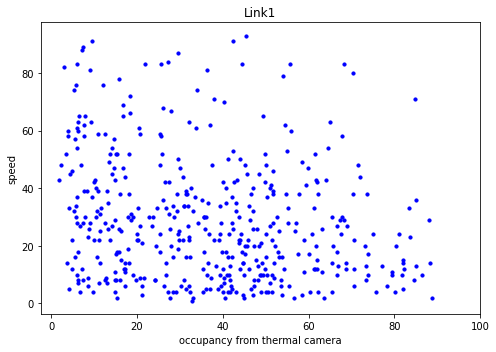

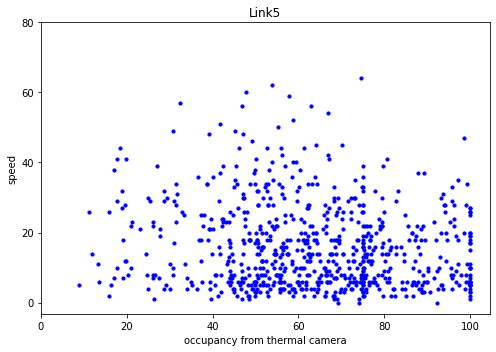

In [ ]:
thermal = {
    'Link1': [10, 11, 12, 13, 14],
    'Link5':[50,51,52,53],
}

available_dates = ['20160531', '20160602', '20160609', '20160614','20160616','20160623' ]
dirpath = '/content/drive/...../'

for link, sensors in thermal.items():
    all_dates = []
    for dates in available_dates:

        temp_df = pd.DataFrame()
        df = pd.DataFrame()

        for sensor in sensors:
            thermal_sensor_df = pd.read_csv(
                dirpath + "/thermal-cctv/" + link + "/" + dates + "_" + str(sensor) + ".csv")
            temp_df['Time'] = thermal_sensor_df['Time']
            temp_df[sensor] = thermal_sensor_df['Occupancy']

        df['average_occupancy'] = temp_df.iloc[:, 1:len(temp_df.columns)].mean(axis=1)

        df['Time'] = pd.to_datetime(temp_df['Time'], format='%H:%M:%S')
        df = df.set_index(pd.DatetimeIndex(df['Time']))
        df = df.set_index(df['Time']).resample('min').mean()
        df = df[(df.index.time >= dt.time(6, 0, 0)) & (df.index.time <= dt.time(9, 30, 0))]


        speed_df = pd.read_csv(dirpath + "/taxi-data/" + dates + "_" + link + ".csv")
        speed_df['time'] = pd.to_datetime(speed_df['time']).dt.time
        speed_df = speed_df[(speed_df['time'] >= dt.time(6, 0, 0)) & (speed_df['time'] <= dt.time(9, 30, 0))]

        all_dates.append([df['average_occupancy'],speed_df['speed']])

    fig = plt.figure(figsize=(7, 5))
    ax = plt.subplot(111)
    for data in all_dates:

        ax.scatter(data[0], data[1], marker="o", s=10, color='blue')

    plt.title (link)
    plt.xlabel('occupancy from thermal camera')
    plt.ylabel('speed')
    plt.xticks(np.arange(0, 120, 20))
    plt.yticks(np.arange(0, 100, 20))
    plt.tight_layout()
    plt.show()

21. <b>Missing days of signal data</b>
<p>We have listed missing days of signal data. There are 176 missing days for signal data.</p>

In [ ]:
startingdate = dt.datetime(2014, 11, 19)
endingdate = dt.datetime(2016, 9, 14)

tempdate = startingdate
dirpath = '/content/drive/...../'
while tempdate <= endingdate:
    path = str(tempdate.year) + "-" + str(tempdate.strftime('%m')) + "-" + str(tempdate.strftime('%d'))
    file = dirpath + "/signal/"+path +".csv"
    if (os.path.isfile(file)):
        pass
    else:
        print(path)
    tempdate = tempdate + timedelta(days=1)

2014-12-27
2014-12-28
2014-12-29
2014-12-30
2014-12-31
2015-01-01
2015-01-02
2015-01-03
2015-01-04
2015-01-05
2015-01-06
2015-01-07
2015-01-08
2015-01-09
2015-01-10
2015-01-11
2015-01-12
2015-01-15
2015-01-16
2015-01-17
2015-01-18
2015-01-19
2015-01-21
2015-01-22
2015-01-23
2015-01-24
2015-01-25
2015-01-26
2015-01-27
2015-01-28
2015-01-29
2015-01-30
2015-01-31
2015-02-01
2015-02-02
2015-03-04
2015-03-25
2015-04-13
2015-04-14
2015-10-28
2015-10-31
2015-11-02
2015-11-03
2015-11-06
2015-11-07
2015-11-09
2015-12-05
2015-12-09
2015-12-10
2015-12-11
2015-12-12
2015-12-15
2015-12-16
2015-12-17
2015-12-18
2015-12-19
2015-12-20
2015-12-22
2015-12-24
2015-12-25
2015-12-26
2015-12-27
2015-12-28
2015-12-29
2015-12-30
2015-12-31
2016-01-01
2016-01-02
2016-01-03
2016-01-04
2016-01-06
2016-01-07
2016-01-08
2016-01-09
2016-01-10
2016-01-11
2016-01-12
2016-01-13
2016-01-14
2016-01-15
2016-01-16
2016-01-18
2016-01-19
2016-01-20
2016-01-22
2016-01-23
2016-01-24
2016-01-25
2016-01-26
2016-01-27
2016-01-28

22. <b>Total number of counts for each traffic signal light phase</b>
<p>Firstly, we list duration for each traffic signal light phase.</p>

In [ ]:
startingdate = dt.datetime(2016, 6, 1) 
endingdate = dt.datetime(2016, 6, 30)

tempdate = startingdate
while tempdate <= endingdate:

    dirpath = '/content/drive/...../'
    os.makedirs(dirpath + '/signal-withduration',exist_ok=True)
    path = str(tempdate.year) + "-" + str(tempdate.strftime('%m')) + "-" + str(tempdate.strftime('%d'))

    snpath = dirpath + "/signal/"+ path + ".csv"
    if (os.path.isfile(snpath)):

        sn = pd.read_csv(snpath, sep=',')
        sn = sn[['Time','Mode','Phase','Duration']]
        p1duration = pd.DataFrame(columns= ['1'])
        p2duration = pd.DataFrame(columns= ['2'])
        p3duration = pd.DataFrame(columns= ['3'])
        p4duration = pd.DataFrame(columns= ['4'])
        p5duration = pd.DataFrame(columns= ['5'])
        p6duration = pd.DataFrame(columns= ['6'])
        p7duration = pd.DataFrame(columns= ['7'])
        p8duration = pd.DataFrame(columns= ['8'])

        for index, row in sn.iterrows():            

            if row['Duration'] == '-' or row['Duration'] == '' or row['Duration'] == np.nan:
                row['Duration'] = 0
            if (math.isnan(np.real(row['Duration']))):
                row['Duration'] = 0

            if row['Phase'] == 1:
                p1duration.loc[index] = row['Duration']
            elif row['Phase'] == 2:
                p2duration.loc[index] = row['Duration']
            elif row['Phase'] == 3:
                p3duration.loc[index] = row['Duration']
            elif row['Phase'] == 4:
                p4duration.loc[index] = row['Duration']
            elif row['Phase'] == 5:
                p5duration.loc[index] = row['Duration']
            elif row['Phase'] == 6:
                p6duration.loc[index] = row['Duration']
            elif row['Phase'] == 7:
                p7duration.loc[index] = row['Duration']
            elif row['Phase'] == 8:
                p8duration.loc[index] = row['Duration']

        p1duration['1'] = p1duration['1'].fillna(0)
        p2duration['1'] = p2duration['2'].fillna(0)
        p3duration['1'] = p3duration['3'].fillna(0)
        p4duration['1'] = p4duration['4'].fillna(0)
        p5duration['1'] = p5duration['5'].fillna(0)
        p6duration['1'] = p6duration['6'].fillna(0)
        p7duration['1'] = p7duration['7'].fillna(0)
        p8duration['1'] = p8duration['8'].fillna(0)

        sn['1'] = p1duration['1']
        sn['2'] = p2duration['2']
        sn['3'] = p3duration['3']
        sn['4'] = p4duration['4']
        sn['5'] = p5duration['5']
        sn['6'] = p6duration['6']
        sn['7'] = p7duration['7']
        sn['8'] = p8duration['8']
        
        sn.to_csv(dirpath + "/signal-withduration/"+ path +".csv", sep=',', index=False)       

    tempdate = tempdate + timedelta(days=1)

<p>We count total numer of times for each traffic signal light phase.</p>

In [ ]:
startingdate = dt.datetime(2016, 6, 1)
endingdate = dt.datetime(2016, 6, 30)

dirpath = '/content/drive/...../'
file = open(dirpath + '/signal-withduration/countphases.csv', mode='w', newline= '')
writer = csv.writer(file)
writer.writerow(['date','1','2','3','4','5','6','7','8'])


tempdate = startingdate
while tempdate <= endingdate:

    path = str(tempdate.year) + "-" + str(tempdate.strftime('%m')) + "-" + str(tempdate.strftime('%d'))

    snpath = dirpath + "/signal-withduration/"+ path + ".csv"
    if (os.path.isfile(snpath)):

        sn = pd.read_csv(snpath, sep=',')
        sn = sn[['Time','1','2','3','4','5','6','7','8']]

        count_on_for_1 = len([i for i in sn['1'] if i > 0])
        count_on_for_3 = len([i for i in sn['3'] if i > 0])
        count_on_for_5 = len([i for i in sn['5'] if i > 0])

        count_on_for_4 = len([i for i in sn['4'] if i > 0])
        count_on_for_6 = len([i for i in sn['6'] if i > 0])
        count_on_for_7 = len([i for i in sn['7'] if i > 0])

        count_on_for_2 = len([i for i in sn['2'] if i > 0])
        count_on_for_8 = len([i for i in sn['8'] if i > 0])

        writer.writerow([path, count_on_for_1,count_on_for_2, count_on_for_3, count_on_for_4, count_on_for_5,count_on_for_6,count_on_for_7,count_on_for_8])

    tempdate = tempdate + timedelta(days=1)
file.close()

<p>We plot total number of counts for each traffic signal light used in Sathorn-Surasak intersection.</p>

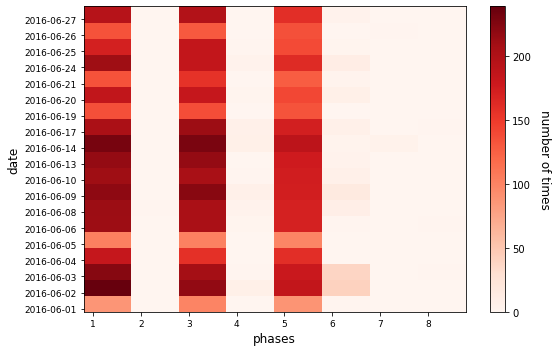

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

dirpath = '/content/drive/...../'

path = dirpath + "/signal-withduration/countphases.csv"

if (os.path.isfile(path)):
    df = pd.read_csv(path, sep=',')
    df = df.set_index((df['date']))

    columns  = df.columns.tolist()
    columns.pop(0)

    fig, axis = plt.subplots()

    heatmap = axis.pcolor(df[columns], cmap='Reds', vmin=0, vmax=max(df.max(axis=1).values))

    axis.set_yticks(np.arange(np.array(df[columns]).shape[0]) + 0.2, minor=False)
    axis.set_xticks(np.arange(np.array(df[columns]).shape[1]) + 0.2, minor=False)

    axis.set_yticklabels(df['date'], minor=False, fontsize=9)
    axis.set_xticklabels(columns, minor=False, fontsize=9)
    axis.set_xlabel("phases", fontsize=12)
    axis.set_ylabel("date", fontsize=12)

    fig.set_size_inches(8, 5)
    cbar=plt.colorbar(heatmap)
    cbar.set_label('number of times', rotation=270,fontsize=12,labelpad=20)
    cbar.ax.tick_params(labelsize=10)
    plt.tight_layout()
    plt.show()

23. <b>Occurrences of phase sequences</b>
<p>We plot occurrences of phase sequences used in Sathorn-Surasak intersection.</p>

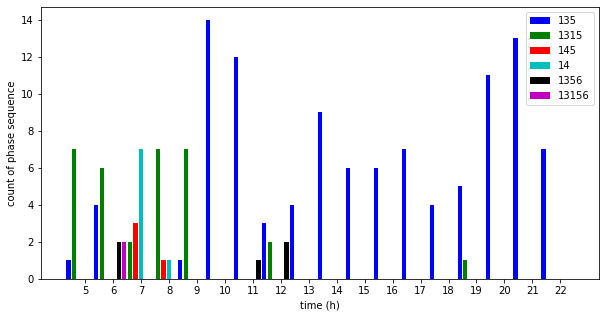

In [ ]:
startingdate = dt.datetime(2016, 6, 2)
endingdate = dt.datetime(2016, 6, 2)

tempdate = startingdate
while tempdate <= endingdate:

    dirpath = '/content/drive/...../'
    path = str(tempdate.year) + "-" + str(tempdate.strftime('%m')) + "-" + str(tempdate.strftime('%d'))

    snpath = dirpath + "/signal/"+ path + ".csv"
    if (os.path.isfile(snpath)):

        sn = pd.read_csv(snpath, sep=',')
        sn = sn[['Time','Mode','Phase','Duration']]
        sn['Time'] = pd.to_datetime(sn['Time'],format='%H:%M:%S')
        sn = sn.set_index(sn['Time'])
        groups = sn.groupby([pd.Grouper(freq='h')])
        sequences = {}

        for name, group in groups:

            try:
                phases = list(map(int,group['Phase'].values))
                seq1  = [1,3,5]
                seq2  = [1,3,1,5]
                seq3  = [1,4,5]
                seq4 =  [1,4]
                seq5  = [1,3,5,6]
                seq6  = [1,3,1,5,6]
                

                seq1_count = sum(phases[i:i + len(seq1)] == seq1 for i in range(len(phases)))
                seq2_count = sum(phases[i:i + len(seq2)] == seq2 for i in range(len(phases)))
                seq3_count = sum(phases[i:i + len(seq3)] == seq3 for i in range(len(phases)))
                seq4_count = sum(phases[i:i + len(seq4)] == seq4 for i in range(len(phases)))
                seq5_count = sum(phases[i:i + len(seq5)] == seq5 for i in range(len(phases)))
                seq6_count = sum(phases[i:i + len(seq6)] == seq6 for i in range(len(phases)))

                sequences[group['Time'].dt.hour.values[0]] = [seq1_count,seq2_count,seq3_count,seq4_count,seq5_count,seq6_count]

            except:
                pass

        keys = [key for key in sequences.keys()]
        values = [value for value in sequences.values()]
        fig, ax = plt.subplots(figsize = (10,5))
        ax.bar(np.arange(len(keys)) - 0.6, [value[0] for value in values],
               width=0.15, color='b', align='center', label = '135')

        ax.bar(np.arange(len(keys)) - 0.4 , [value[1] for value in values],
               width=0.15, color='g', align='center', label = '1315')
        
        ax.bar(np.arange(len(keys)) - 0.2, [value[2] for value in values],
               width=0.15, color='r', align='center', label = '145')
        
        ax.bar(np.arange(len(keys)) , [value[3] for value in values],
               width=0.15, color='c', align='center', label = '14')
         
        ax.bar(np.arange(len(keys)) + 0.2, [value[4] for value in values],
               width=0.15, color='k', align='center', label = '1356')
         
        ax.bar(np.arange(len(keys)) + 0.4, [value[5] if len(value) == 6 else 0 for value in values],
               width=0.15, color='m', align='center', label = '13156')

        ax.set_xticklabels(keys)
        ax.set_xticks(np.arange(len(keys)))
        plt.xlabel('time (h)')
        plt.ylabel('count of phase sequence')
        plt.legend()
        plt.show()
    tempdate = tempdate + timedelta(days=1)

24. <b>Manual collected traffic data</b>
<p>Before measuring the traffic data using real-world sensors in the critical inbound-outbound Sathorn-Surasak intersection, we have tried to collect the data manually in the extensive coverage area on the same sample day, 31 July 2014, for morning and evening rush hours from 6 AM to 9:30 AM and 2 PM to 8:30 PM. Here, we plot manual collected traffic volume data.</p>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/axes_grid.py:51: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid1.colorbar module was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use matplotlib.colorbar instead.
  from .colorbar import Colorbar


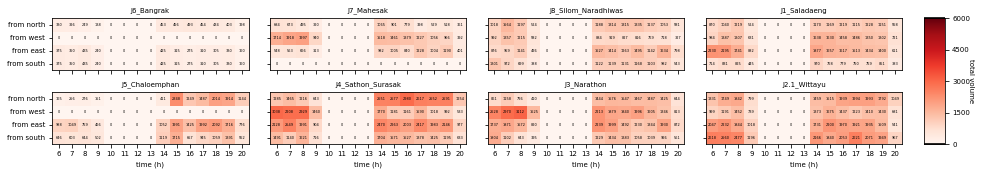

In [ ]:
from mpl_toolkits.axes_grid1 import ImageGrid
dirpath = '/content/drive/...../'
intersections = [
                'J6_Bangrak',
                'J7_Mahesak',
                'J8_Silom_Naradhiwas',
                'J1_Saladaeng',
                'J5_Chaloemphan',
                'J4_Sathon_Surasak',
                'J3_Narathon',
                'J2.1_Wittayu',
                ]
fig = plt.figure(1, (6., 6.))
grid = ImageGrid(fig, 111,nrows_ncols=(2, 4), axes_pad=0.3, cbar_mode='single',cbar_size=0.3,
                 cbar_pad=0.3,cbar_location = 'right',label_mode = 'L', share_all=True
                 )

index  = 0
for i, ax in enumerate(grid):
    columns = ['time', 'from south', 'from east', 'from west', 'from north']
    volume = pd.read_csv(dirpath+'/manual-volume/'+intersections[index]+'_volume.csv', sep=',', usecols = columns)
    volume['time'] = pd.to_datetime(volume['time'], format='%H:%M:%S')
    volume = volume.set_index(volume['time'])
    data = []
    columns.pop(0)
    for column in columns:
        data.append(volume[column].resample('h').sum())

    heatmap = ax.pcolor(data, cmap='Reds', vmin=0, vmax=6000)
    cbar = grid.cbar_axes[0].colorbar(heatmap)
    cbar.set_label_text('total volume', rotation=270, fontsize=7)
    cbar.ax.tick_params(labelsize=7)

    # this code block is to put text in heatmap cell
    for y in range(np.array(data).shape[0]):
        for x in range(np.array(data).shape[1]):
            ax.text(x + 0.5, y + 0.5, '%.0f' % np.array(data)[y, x],
                     horizontalalignment='center',
                     verticalalignment='center',
                     color='black', fontsize =3.5)

    ax.set_yticks(np.arange(np.array(data).shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(np.array(data).shape[1]) + 0.5, minor=False)
    ax.set_xlabel("time (h)", fontsize=7)
    ax.set_yticklabels(columns, minor=False, fontsize=7)
    ax.set_xticklabels(['6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'], minor=False, fontsize=7)
    ax.set_title(intersections[index], fontsize=7)
    index +=1

plt.gcf().set_size_inches(16, 2.5)
plt.show()

<p>Here, we plot manual collected queue length data.</p>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.


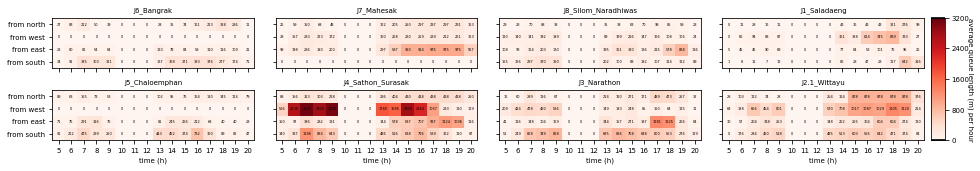

In [ ]:
intersections = [
                'J6_Bangrak',
                'J7_Mahesak',
                'J8_Silom_Naradhiwas',
                'J1_Saladaeng',
                'J5_Chaloemphan',
                'J4_Sathon_Surasak',
                'J3_Narathon',
                'J2.1_Wittayu',
                ]
dirpath = '/content/drive/...../'
columns = ['from south','from east','from west','from north']
fig = plt.figure(1, (6., 6.))
grid = ImageGrid(fig, 111,nrows_ncols=(2, 4), axes_pad=0.3, cbar_mode='single',cbar_size=0.2,
                 cbar_pad=0.09,cbar_location = 'right',label_mode = 'L'
                 )
for ax, intersection in zip(grid, intersections):
    queue = pd.read_csv(dirpath+'/manual-queue/'+intersection+'_queue.csv', sep=',')
    queue['time'] = pd.to_datetime(queue['time'], format='%H:%M')
    queue = queue.set_index(queue['time'])
    data = []
    for column in columns:
        data.append(queue[column].resample('h').mean().fillna(0))

    heatmap = ax.pcolor(data, cmap='Reds', vmin=0, vmax=3200)
    cbar = grid.cbar_axes[0].colorbar(heatmap)
    cbar.ax.tick_params(labelsize=7, pad=3)
    cbar.set_label_text('average queue length (m) per hour', rotation=270, fontsize=7)

    # this code block is to put text in heatmap cell
    for y in range(np.array(data).shape[0]):
        for x in range(np.array(data).shape[1]):
             ax.text(x + 0.5, y + 0.5, '%.0f' % np.array(data)[y, x],
                     horizontalalignment='center',
                     verticalalignment='center',
                     color='black', fontsize =3.5)

    ax.set_yticks(np.arange(np.array(data).shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(np.array(data).shape[1]) + 0.5, minor=False)

    ax.set_yticklabels(columns, minor=False, fontsize=7)
    ax.set_xticklabels(['5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'], minor=False, fontsize=7)
    ax.set_xlabel("time (h)", fontsize=7)
    ax.set_title(intersection, fontsize=7)

plt.gcf().set_size_inches(16,2.5)
plt.show()

<p>Here, we plot manual collected traffic signal data.</p>

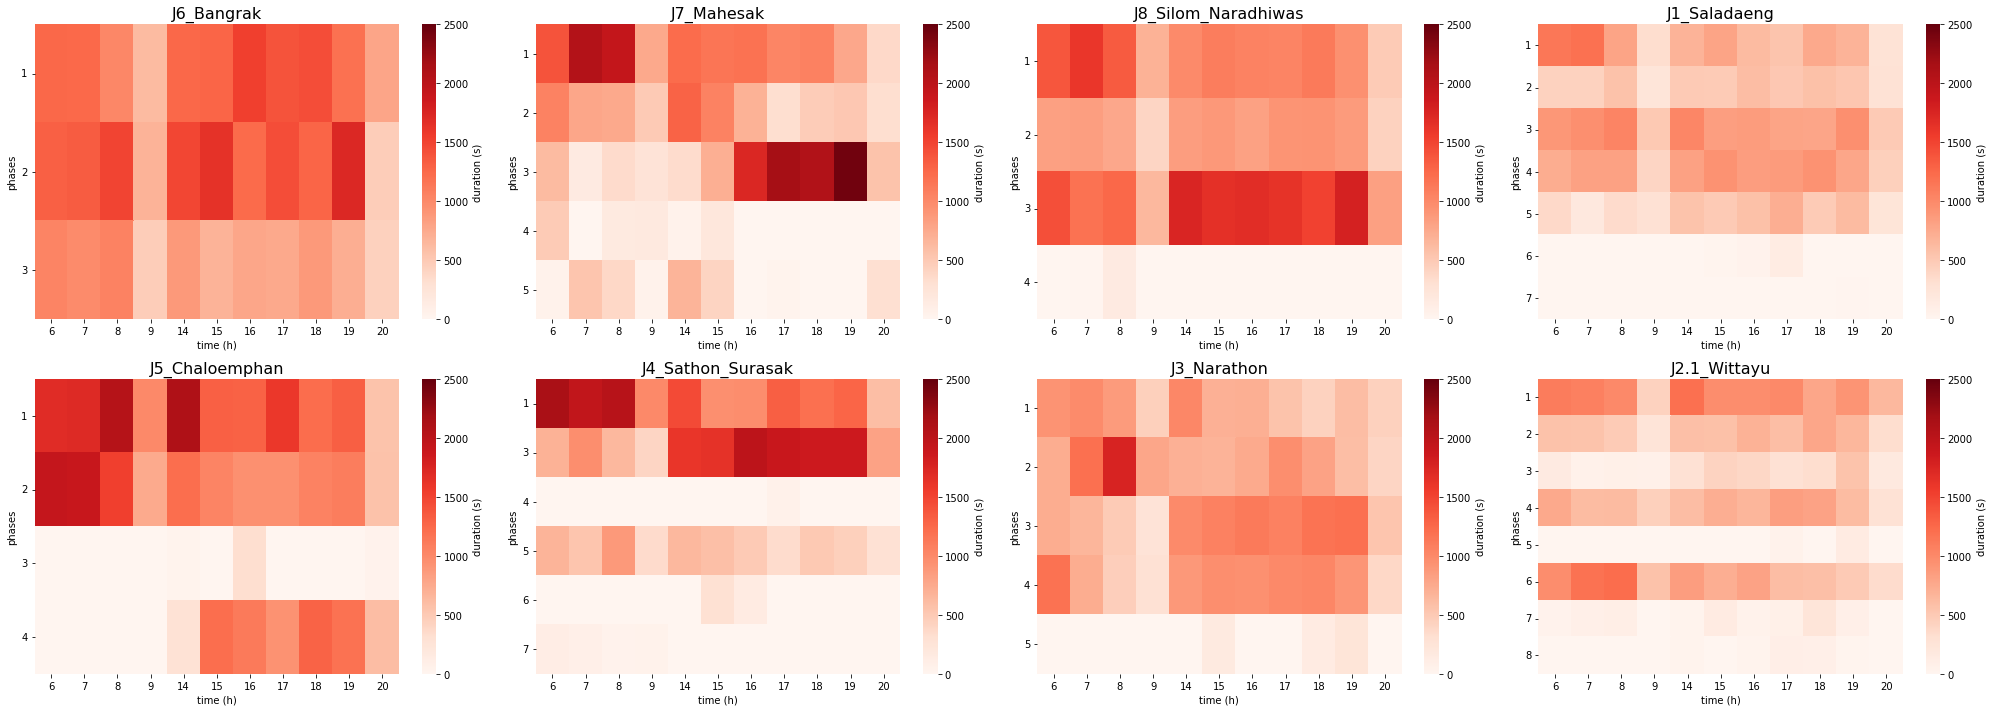

In [ ]:
import seaborn as sns
intersections = [
                'J6_Bangrak',
                'J7_Mahesak',
                'J8_Silom_Naradhiwas',
                'J1_Saladaeng',
                'J5_Chaloemphan',
                'J4_Sathon_Surasak',
                'J3_Narathon',
                'J2.1_Wittayu',
                ]
dirpath = '/content/drive/...../'
fig, axes = plt.subplots(2,4,figsize=(28,10))

for i, ax in enumerate(axes.flatten()):
    signal = pd.read_csv(dirpath+'/manual-signal/' + intersections[i] + '_signal.csv', sep=',')
    signal['Time'] = pd.to_datetime(signal['Time'], format='%H:%M:%S')
    signal = signal.set_index(signal['Time'])

    signal = signal.groupby([signal.index.hour.rename('Time'),
                      signal.Phase])['Duration'].sum().reset_index()

    duration = {}
    for index, row in signal.iterrows():
        duration[(row['Phase'],row['Time'])] = row['Duration']

    ser = pd.Series(list(duration.values()),
                    index=pd.MultiIndex.from_tuples(duration.keys()))
    df = ser.unstack().fillna(0)

    sns.heatmap(df,cmap='Reds', ax = ax, annot_kws={"fontsize":8},cbar_kws={'label': 'duration (s)'},
                vmin=0, vmax= 2500)

    for tick in ax.get_yticklabels():
        tick.set_rotation(0)

    ax.set_title(intersections[i],fontsize = 16)
    ax.set_xlabel('time (h)', fontsize = 10)
    ax.set_ylabel('phases', fontsize= 10)

plt.tight_layout()
plt.show()